#**Quantopian Lecture Series: Introduction to Research**


$$ x_1^{2}+y_1^{2}=1  $$

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [ ]:
2 + 2

4


##**Mi Ejemplo 1**

In [ ]:
15 + 31

46

Sometimes there is no result to be printed, as is the case with assignment.

In [ ]:
X = 2
print(X)

2


##**Mi Ejemplo 2**

In [ ]:
L = 8
print(L)

8


Remember that only the result from the last line is printed.

In [ ]:
2 + 2
3 + 3

6

##**Mi Ejemplo 3**

In [ ]:
2 + 77
3 + 884
45*32
2*4

8

However, you can print whichever lines you want using the `print` statement.

##**Mi Ejemplo 4**

In [ ]:
print(78 - 69)
print(13 + 96)
10/3

9
109


3.3333333333333335

##Knowing When a Cell is Running



In [ ]:
#Take some time to run something
c = 0
for i in range(11):
    c = c + i
c

55

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

In [ ]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

##Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

##**Mi Ejemplo 5**

In [ ]:
x =np.cos(0)
x

1.0

##Sampling

We'll sample some random data using a function from `numpy`.

In [ ]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0,1,100)

##Plotting

We can use the plotting library we imported as follows.

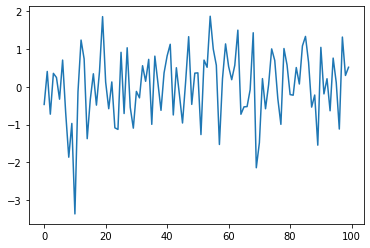

In [ ]:
plt.plot(X)

###Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

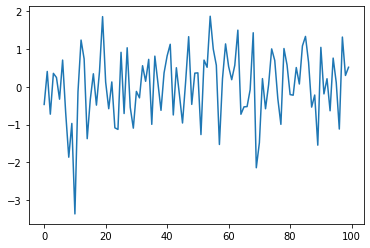

In [ ]:
plt.plot(X);

###Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

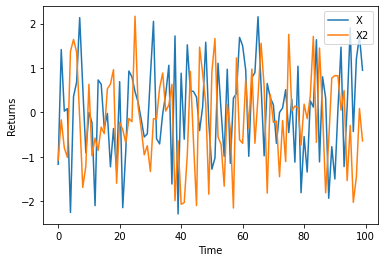

In [ ]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

##**Mi Ejemplo 6**

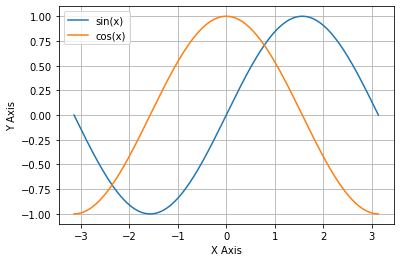

In [ ]:
x1 = np.arange(-1*np.pi,np.pi, 0.001)
y1 = np.sin(x1)

x2=np.arange(-1*np.pi,np.pi, 0.01)
y2=np.cos(x2)

plt.plot(x1,y1);
plt.plot(x2,y2);

plt.grid(axis='both');
plt.ylabel("Y Axis");
plt.xlabel("X Axis");

plt.legend(['sin(x)','cos(x)']);

##Generating Statistics

Let's use `numpy` to take some simple statistics.

In [ ]:
np.mean(X)

22.6

In [ ]:
np.std(X)

23.156856436053666

##**Mi Ejemplo 7**

Promedio= 2.149725596367751
Desviación= 0.8076729585214504


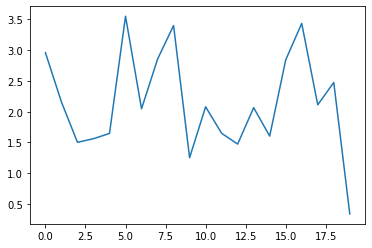

In [ ]:
x3=np.random.normal(2,1,20)
print("Promedio=", np.mean(x3))
print("Desviación=", np.std(x3))
plt.plot(x3);

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

data = yf.download("MSFT", start="2012-1-1", end="2015-6-1") 

[*********************100%***********************]  1 of 1 completed


Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.623129,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,22.132011,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.358175,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.705503,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.406637,59706800
...,...,...,...,...,...,...
2015-05-22,47.299999,47.349998,46.820000,46.900002,41.795208,25720600
2015-05-26,46.830002,46.880001,46.189999,46.590000,41.518955,29581900
2015-05-27,46.820000,47.770000,46.619999,47.610001,42.427937,27335600


This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [ ]:
X = data['Close']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

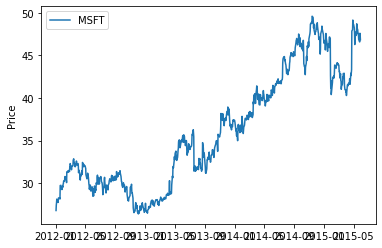

In [ ]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

We can get statistics again on real data.

In [ ]:
np.mean(X)

36.05204441837061

In [ ]:
np.std(X)

6.691260772637948

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

In [ ]:
R = X.pct_change()[1:]

We can plot the returns distribution as a histogram.

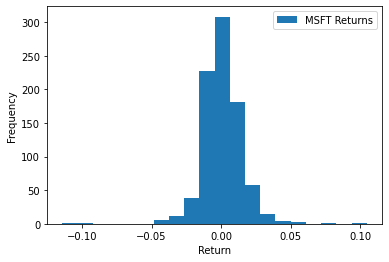

In [ ]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

Get statistics again.

In [ ]:
np.mean(R)

0.0007593053938455802

In [ ]:
np.std(R)

0.014427919863141542

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

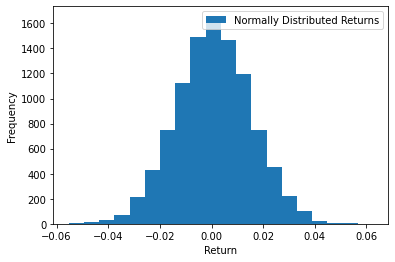

In [ ]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

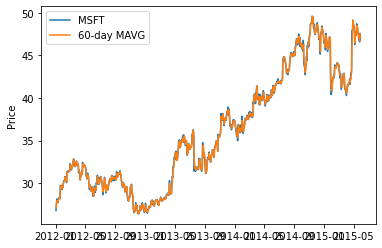

In [ ]:
# Take the average of the last 60 days at each timepoint.
MAVG = X.rolling(2).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.

# **Introduction to Python**


## Code Comments

A comment is a note made by a programmer in the source code of a program. Its purpose is to clarify the source code and make it easier for people to follow along with what is happening. Anything in a comment is generally ignored when the code is actually run, making comments useful for including explanations and reasoning as well as removing specific lines of code that you may be unsure about. Comments in Python are created by using the pound symbol (`# Insert Text Here`). Including a `#` in a line of code will comment out anything that follows it.

In [ ]:
# This is a comment
# These lines of code will not change any values
# Anything following the first # is not run as code

You may hear text enclosed in triple quotes (`""" Insert Text Here """`) referred to as multi-line comments, but this is not entirely accurate. This is a special type of `string` (a data type we will cover), called a `docstring`, used to explain the purpose of a function.

In [ ]:
""" This is a special string """

' This is a special string '

##**Mi Ejemplo 8**

In [ ]:
#Este es el ejemplo 8 :( me faltan 192
"""Ejemplo 8 de 200"""

'Ejemplo 8'

Make sure you read the comments within each code cell (if they are there). They will provide more real-time explanations of what is going on as you look at each line of code.

## Variables

Variables provide names for values in programming. If you want to save a value for later or repeated use, you give the value a name, storing the contents in a variable. Variables in programming work in a fundamentally similar way to variables in algebra, but in Python they can take on various different data types.

The basic variable types that we will cover in this section are `integers`, `floating point numbers`, `booleans`, and `strings`. 

An `integer` in programming is the same as in mathematics, a round number with no values after the decimal point. We use the built-in `print` function here to display the values of our variables as well as their types!

In [ ]:
my_integer = 50
print(my_integer, type(my_integer))

50 <class 'int'>


##**Mi Ejemplo 9**

In [ ]:
variable= (78*10**10)+1.35
print(variable,type(variable))

780000000001.35 <class 'float'>


Variables, regardless of type, are assigned by using a single equals sign (`=`). Variables are case-sensitive so any changes in variation in the capitals of a variable name will reference a different variable entirely.

In [ ]:
one = 1
print(One)

NameError: ignored

A `floating point` number, or a `float` is a fancy name for a real number (again as in mathematics). To define a `float`, we need to either include a decimal point or specify that the value is a float.

In [ ]:
my_float = 1.0
print(my_float, type(my_float))
my_float = float(1)
print(my_float, type(my_float))

1.0 <class 'float'>
1.0 <class 'float'>


A variable of type `float` will not round the number that you store in it, while a variable of type `integer` will. This makes `floats` more suitable for mathematical calculations where you want more than just integers.

Note that as we used the `float()` function to force an number to be considered a `float`, we can use the `int()` function to force a number to be considered an `int`.

In [ ]:
my_int = int(3.14159)
print(my_int, type(my_int))

3 <class 'int'>


The `int()` function will also truncate any digits that a number may have after the decimal point!

Strings allow you to include text as a variable to operate on. They are defined using either single quotes ('') or double quotes ("").

In [ ]:
my_string = 'This is a string with single quotes'
print(my_string)
my_string = "This is a string with double quotes"
print(my_string)

This is a string with single quotes
This is a string with double quotes


Both are allowed so that we can include apostrophes or quotation marks in a string if we so choose.

In [ ]:
my_string = '"Jabberwocky", by Lewis Carroll'
print(my_string)
my_string = "'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;"
print(my_string)

"Jabberwocky", by Lewis Carroll
'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;


Booleans, or `bools` are binary variable types. A `bool` can only take on one of two values, these being `True` or `False`. There is much more to this idea of truth values when it comes to programming, which we cover later in the [Logical Operators](#id-section5) of this notebook.

In [ ]:
my_bool = True
print(my_bool, type(my_bool))

True <class 'bool'>


There are many more data types that you can assign as variables in Python, but these are the basic ones! We will cover a few more later as we move through this tutorial.

## Basic Math

Python has a number of built-in math functions. These can be extended even further by importing the **math** package or by including any number of other calculation-based packages.

All of the basic arithmetic operations are supported: `+`, `-`, `/`, and `*`. You can create exponents by using `**` and modular arithmetic is introduced with the mod operator, `%`.

In [ ]:
print('Addition: ', 2 + 2)
print('Subtraction: ', 7 - 4)
print('Multiplication: ', 2 * 5)
print('Division: ', 10 / 2)
print('Exponentiation: ', 3**2)

Addition:  4
Subtraction:  3
Multiplication:  10
Division:  5.0
Exponentiation:  9


If you are not familiar with the the mod operator, it operates like a remainder function. If we type $15 \ \% \ 4$, it will return the remainder after dividing $15$ by $4$.

In [ ]:
print('Modulo: ', 15 % 4)

Modulo:  3


Mathematical functions also work on variables!

In [ ]:
first_integer = 4
second_integer = 5
print(first_integer * second_integer)

20


Make sure that your variables are floats if you want to have decimal points in your answer. If you perform math exclusively with integers, you get an integer. Including any float in the calculation will make the result a float.

In [ ]:
first_integer = 11
second_integer = 3
print(first_integer / second_integer)

3.6666666666666665


In [ ]:
first_number = 11.0
second_number = 3.0
print(first_number / second_number)

3.6666666666666665


Python has a few built-in math functions. The most notable of these are:

* `abs()`
* `round()`
* `max()`
* `min()`
* `sum()`

These functions all act as you would expect, given their names. Calling `abs()` on a number will return its absolute value. The `round()` function will round a number to a specified number of the decimal points (the default is $0$). Calling `max()` or `min()` on a collection of numbers will return, respectively, the maximum or minimum value in the collection. Calling `sum()` on a collection of numbers will add them all up. If you're not familiar with how collections of values in Python work, don't worry! We will cover collections in-depth in the next section. 

Additional math functionality can be added in with the `math` package.

In [ ]:
import math

The math library adds a long list of new mathematical functions to Python. Feel free to check out the [documentation](https://docs.python.org/2/library/math.html) for the full list and details. It concludes some mathematical constants

In [ ]:
print('Pi: ', math.pi)
print("Euler's Constant: ", math.e)

Pi:  3.141592653589793
Euler's Constant:  2.718281828459045


As well as some commonly used math functions

In [ ]:
print('Cosine of pi: ', math.cos(math.pi))

Cosine of pi:  -1.0


##**Mi Ejemplo 10**

In [ ]:
print('Adición: ', 77 + 474)
print('Sustracción: ', 77 - 474)
print('Multiplicación: ',  77* 474)
print('División: ', 77 / 474)
print('Potenciación: ', 77**474)
print('Módulo: ', 77 % 474)

Adición:  551
Sustracción:  -397
Multiplicación:  36498
División:  0.16244725738396623
Potenciación:  1572547352425531369183193564636768315823646032015652843606756680383282616781624087227470418096817762579004908748133645513573081046713098859826844918619788573704062111343945962949778814493794283878788436129906300949305710862973215799011223231676078196949284551228750837476232794500003047128150006053980801569193425318409236122865251066599923043183739921193981628209175862922337197023251849834801875016585909805488368671407346262481203568054544558532174593591536744412094808878781232148391546787312881495898368006760548707894679830491176319085727944047590711082526129725656926530400051791985040681511167551216910397042473223901817949422894382721911430948555455797943106691950609508798172208459633230490514230596923192475655920714308383893691742249768562592031037917281475947508312705793493296477224389322226722962724158933868202739101855304356031664033676957051653129741102870231482574752895152009
Mó

##**Mi Ejemplo 11**

In [ ]:
a=5
b=2.5
print('a=',a)
print('b=',b)
print('a+b=', a + b)
print('a-b ', a - b)
print('a*b ',  a*b)
print('a/b', a/b)
print('a^b', a**b)
print('a%b ', a% b)

a= 5
b= 2.5
a+b= 7.5
a-b  2.5
a*b  12.5
a/b 2.0
a^b 55.90169943749474
a%b  0.0


##**Mi Ejemplo 12**

In [ ]:
a12=48.5+57.5
b12=48-57
c12=48.5*57
d12='huevo '+'con '+'arroz'

print("Adición",a12,type(a12))
print("Sustración", b12,type(b12))
print("Multiplicación", c12,type(c12))
print("Mi almuerzo es", d12,type(d12))

Adición 106.0 <class 'float'>
Sustración -9 <class 'int'>
Multiplicación 2764.5 <class 'float'>
Mi almuerzo es huevo con arroz <class 'str'>


##**Mi Ejemplo 13**

In [ ]:
a13=34.11-48
b13=234.547
c13=([14,8,78,13,566,-37.7,0,-2])

print("Valor absoluto de 34.11 - 48 =",abs(a13))
print("Redondeo de ",b13, "=", round(b13))
print("Valor mínimo de la serie", c13, "=", min(c13))
print("Valor máximo de la serie", c13, "=", max(c13))
print("Suma de la serie", c13, "=", sum(c13))

Valor absoluto de 34.11 - 48 = 13.89
Redondeo de  234.547 = 235
Valor mínimo de la serie [14, 8, 78, 13, 566, -37.7, 0, -2] = -37.7
Valor máximo de la serie [14, 8, 78, 13, 566, -37.7, 0, -2] = 566
Suma de la serie [14, 8, 78, 13, 566, -37.7, 0, -2] = 639.3


##**Mi Ejemplo 14**

In [ ]:
import math as m
a14=m.cos(m.e)
print("Coseno de Euler = ", a14)
b14=m.sin(m.pi)
print("Seno de Phi = ", b14)

Coseno de Euler =  -0.9117339147869651
Seno de Phi =  1.2246467991473532e-16


## Collections
### Lists

A `list` in Python is an ordered collection of objects that can contain any data type. We define a `list` using brackets (`[]`).

In [ ]:
my_list = [1, 2, 3]
print(my_list)

[1, 2, 3]


We can access and index the list by using brackets as well. In order to select an individual element, simply type the list name followed by the index of the item you are looking for in braces.

In [ ]:
print(my_list[0])
print(my_list[2])

1
3


Indexing in Python starts from $0$. If you have a list of length $n$, the first element of the list is at index $0$, the second element is at index $1$, and so on and so forth. The final element of the list will be at index $n-1$. Be careful! Trying to access a non-existent index will cause an error.

In [ ]:
print('The first, second, and third list elements: ', my_list[0], my_list[1], my_list[2])
print('Accessing outside the list bounds causes an error: ', my_list[1])

NameError: ignored

We can see the number of elements in a list by calling the `len()` function.

In [ ]:
print(len(my_list))

3


We can update and change a list by accessing an index and assigning new value.

In [ ]:
print(my_list)
my_list[0] = 42
print(my_list)

[42, 2, 3]
[42, 2, 3]


This is fundamentally different from how strings are handled. A `list` is mutable, meaning that you can change a `list`'s elements without changing the list itself. Some data types, like `strings`, are immutable, meaning you cannot change them at all. Once a `string` or other immutable data type has been created, it cannot be directly modified without creating an entirely new object.

As we stated before, a list can contain any data type. Thus, lists can also contain strings.

In [ ]:
my_list_2 = ['one', 'two', 'three']
print(my_list_2)

['one', 'two', 'three']


Lists can also contain multiple different data types at once!

In [ ]:
my_list_3 = [True, 'False', 42]
print(my_list_3)

[True, 'False', 42]


If you want to put two lists together, they can be combined with a `+` symbol.

In [ ]:
my_list_4 = my_list + my_list_2 + my_list_3
print(my_list_4)

[42, 2, 3, 'one', 'two', 'three', True, 'False', 42]


In addition to accessing individual elements of a list, we can access groups of elements through slicing.

In [ ]:
my_list = ['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

##**Mi Ejemplo 15**

In [ ]:
lista15=([2,5,7,79,345,-10,0,-45,34,3,1])
lista15_2 = ([23,241,41,1,2344,657,8634,7,1,1,1])
print("Lista 1 =", lista15 )
print("Lista 2 =", lista15_2 )

Lista 1 = [2, 5, 7, 79, 345, -10, 0, -45, 34, 3, 1]
Lista 2 = [23, 241, 41, 1, 2344, 657, 8634, 7, 1, 1, 1]


##**Mi Ejemplo 16**

In [ ]:
lista16=("Verdadero", True, 26, "Falso")
print("Lista 1 =", lista15 )
print("Lista 2 =", lista15_2 )
print("Lista 3 =", lista16)
print("Elemento 5 de la Lista 1 =", lista15[5])
print("Elemento 5 de la Lista 2 =", lista15_2[5])
print("Elemento 1 de la Lista 3 =", lista16[1])


Lista 1 = [2, 5, 7, 79, 345, -10, 0, -45, 34, 3, 1]
Lista 2 = [23, 241, 41, 1, 2344, 657, 8634, 7, 1, 1, 1]
Lista 3 = ('Verdadero', True, 26, 'Falso')
Elemento 5 de la Lista 1 = -10
Elemento 5 de la Lista 2 = 657
Elemento 1 de la Lista 3 = True


##**Mi Ejemplo 17**

In [ ]:
lista17= lista15 + lista15_2
print("Lista 4 =", lista17)
lista15[2]=12

Lista 4 = [2, 5, 12, 79, 345, -10, 0, -45, 34, 3, 1, 23, 241, 41, 1, 2344, 657, 8634, 7, 1, 1, 1]


## Slicing

We use the colon (`:`) to slice lists. 

In [ ]:
print(my_list[2:4])

['countrymen', 'lend']


Using `:` we can select a group of elements in the list starting from the first element indicated and going up to  (but not including) the last element indicated.

We can also select everything after a certain point

In [ ]:
print(my_list[1:])

['romans', 'countrymen', 'lend', 'me', 'your', 'ears']


And everything before a certain point

In [ ]:
print(my_list[:4])

['friends', 'romans', 'countrymen', 'lend']


Using negative numbers will count from the end of the indices instead of from the beginning. For example, an index of `-1` indicates the last element of the list.

In [ ]:
print(my_list[-1])

ears


You can also add a third component to slicing. Instead of simply indicating the first and final parts of your slice, you can specify the step size that you want to take. So instead of taking every single element, you can take every other element.

In [ ]:
print(my_list[0:7:2])

['friends', 'countrymen', 'me', 'ears']


Here we have selected the entire list (because `0:7` will yield elements `0` through `6`) and we have selected a step size of `2`. So this will spit out element `0` , element `2`, element `4`, and so on through the list element selected. We can skip indicated the beginning and end of our slice, only indicating the step, if we like.

In [ ]:
print(my_list[::2])

['friends', 'countrymen', 'me', 'ears']


Lists implictly select the beginning and end of the list when not otherwise specified.

In [ ]:
print(my_list[:])

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']


With a negative step size we can even reverse the list!

In [ ]:
print(my_list[::-1])

['ears', 'your', 'me', 'lend', 'countrymen', 'romans', 'friends']


Python does not have native matrices, but with lists we can produce a working fascimile. Other packages, such as `numpy`, add matrices as a separate data type, but in base Python the best way to create a matrix is to use a list of lists.

We can also use built-in functions to generate lists. In particular we will look at `range()` (because we will be using it later!). Range can take several different inputs and will return a list.

In [ ]:
b = 10
my_list = range(b)
print(my_list)

range(0, 10)


Similar to our list-slicing methods from before, we can define both a start and an end for our range. This will return a list that is includes the start and excludes the end, just like a slice.

In [ ]:
a = 0
b = 10
my_list = range(a, b)
print(my_list)

range(0, 10)


We can also specify a step size. This again has the same behavior as a slice.

In [ ]:
a = 0
b = 10
step = 2
my_list = range(a, b, step)
print(my_list)

range(0, 10, 2)


##**Mi Ejemplo 18**

In [ ]:
lista18=['mesa', 'esfero', 'silla', 'cama', 'cuaderno', 'libro', 'borrador', 'lápiz']

print(lista18[1:3])
print(lista18[1:])
print(lista18[4:])
print(lista18[-1])
print(lista18[-3])
print(lista18[0:7:2])

['esfero', 'silla']
['esfero', 'silla', 'cama', 'cuaderno', 'libro', 'borrador', 'lápiz']
['cuaderno', 'libro', 'borrador', 'lápiz']
lápiz
libro
['mesa', 'silla', 'cuaderno', 'borrador']


## Tuples

A `tuple` is a data type similar to a list in that it can hold different kinds of data types. The key difference here is that a `tuple` is immutable. We define a `tuple` by separating the elements we want to include by commas. It is conventional to surround a `tuple` with parentheses.

In [ ]:
my_tuple = 'I', 'have', 30, 'cats'
print(my_tuple)

('I', 'have', 30, 'cats')


In [ ]:
my_tuple = ('I', 'have', 30, 'cats')
print(my_tuple)

('I', 'have', 30, 'cats')


As mentioned before, tuples are immutable. You can't change any part of them without defining a new tuple.

In [ ]:
my_tuple[3] = 'dogs' # Attempts to change the 'cats' value stored in the the tuple to 'dogs'

TypeError: ignored

You can slice tuples the same way that you slice lists!

In [ ]:
print(my_tuple[1:3])

('have', 30)


And concatenate them the way that you would with strings!

In [ ]:
my_other_tuple = ('make', 'that', 50)
print(my_tuple + my_other_tuple)

('I', 'have', 30, 'cats', 'make', 'that', 50)


We can 'pack' values together, creating a tuple (as above), or we can 'unpack' values from a tuple, taking them out.

In [ ]:
str_1, str_2, int_1 = my_other_tuple
print(str_1, str_2, int_1)

make that 50


Unpacking assigns each value of the tuple in order to each variable on the left hand side of the equals sign. Some functions, including user-defined functions, may return tuples, so we can use this to directly unpack them and access the values that we want.

##**Mi Ejemplo 19**

In [ ]:
my_tuple19 = 45, 'Suzuki', 47, 'Yamaha','Honda', 'AKT', 'Pulsar', 'Kawasaki', 732
print (my_tuple19)

(45, 'Suzuki', 47, 'Yamaha', 'Honda', 'AKT', 'Pulsar', 'Kawasaki', 732)


##**Mi Ejemplo 20**

In [ ]:
my_tuple20 = (45, 'Suzuki', 47, 'Yamaha','Honda', 'AKT', 'Pulsar', 'Kawasaki', 732)
print(my_tuple20)

(45, 'Suzuki', 47, 'Yamaha', 'Honda', 'AKT', 'Pulsar', 'Kawasaki', 732)


##**Mi Ejemplo 21**

In [ ]:
print(my_tuple20[1:3]) #Tomar el dato 1 y 3
print(my_tuple20[3:]) #Tomar todos los datos despues del tercero
print(my_tuple20[1:6:2]) #Tomar cada dos datos entre el primer y sexto dato

('Suzuki', 47)
('Yamaha', 'Honda', 'AKT', 'Pulsar', 'Kawasaki', 732)
('Suzuki', 'Yamaha', 'AKT')


##**Mi Ejemplo 22**

In [ ]:
my_other_tuple = ('Samurai', 'Audi', 87, 'Renault', 50, 'Chevrolet', 78, 'Toyota')
print(my_tuple20 + my_other_tuple) #Unir las dos tuplas

(45, 'Suzuki', 47, 'Yamaha', 'Honda', 'AKT', 'Pulsar', 'Kawasaki', 732, 'Samurai', 'Audi', 87, 'Renault', 50, 'Chevrolet', 78, 'Toyota')


##**Mi Ejemplo 23**

## Sets

A `set` is a collection of unordered, unique elements. It works almost exactly as you would expect a normal set of things in mathematics to work and is defined using braces (`{}`).

In [ ]:
things_i_like = {'dogs', 7, 'the number 4', 4, 4, 4, 42, 'lizards', 'man I just LOVE the number 4'}
print(things_i_like, type(things_i_like))

{'dogs', 4, 7, 'the number 4', 'man I just LOVE the number 4', 42, 'lizards'} <class 'set'>


Note how any extra instances of the same item are removed in the final set. We can also create a `set` from a list, using the `set()` function.

In [ ]:
animal_list = ['cats', 'dogs', 'dogs', 'dogs', 'lizards', 'sponges', 'cows', 'bats', 'sponges']
animal_2set= set(animal_list)
print(animal_2set) # Removes all extra instances from the list)

{'sponges', 'dogs', 'cows', 'bats', 'cats', 'lizards'}


Calling `len()` on a set will tell you how many elements are in it.

In [ ]:
print(len(animal_2set))

6


Because a `set` is unordered, we can't access individual elements using an index. We can, however, easily check for membership (to see if something is contained in a set) and take the unions and intersections of sets by using the built-in set functions.

In [ ]:
'cats' in animal_2set # Here we check for membership using the `in` keyword.

True

Here we checked to see whether the string 'cats' was contained within our `animal_set` and it returned `True`, telling us that it is indeed in our set.

We can connect sets by using typical mathematical set operators, namely `|`, for union, and `&`, for intersection. Using `|` or `&` will return exactly what you would expect if you are familiar with sets in mathematics.

In [ ]:
print(animal_2set|things_i_like) # You can also write things_i_like | animal_set with no difference

{'sponges', 'dogs', 'cows', 4, 7, 'the number 4', 'man I just LOVE the number 4', 'bats', 42, 'cats', 'lizards'}


Pairing two sets together with `|` combines the sets, removing any repetitions to make every set element unique.

In [ ]:
print(animal_2set & things_i_like) # You can also write things_i_like & animal_set with no difference

{'dogs', 'lizards'}


Pairing two sets together with `&` will calculate the intersection of both sets, returning a set that only contains what they have in common.

If you are interested in learning more about the built-in functions for sets, feel free to check out the [documentation](https://docs.python.org/2/library/sets.html).

##**Mi Ejemplo 23**

In [ ]:
Motos={145,'DFG', 'ABC', 'Suzuki', 147, 'Yamaha','Suzuki', 'AKT', 'Pulsar', 145, 'AKT', 'Kawasaki', 732, 'AKT'}
print(Motos, type(Motos))

{'AKT', 'Kawasaki', 'Suzuki', 145, 'DFG', 147, 'Yamaha', 'ABC', 732, 'Pulsar'} <class 'set'>


##**Mi Ejemplo 24**

In [ ]:
Lista_motos=[145,'DFG', 'ABC', 'Suzuki', 147, 'Yamaha','Suzuki', 'AKT', 'Pulsar', 145, 'AKT', 'Kawasaki', 732, 'AKT']
Motos_set=set(Lista_motos)
print(Motos_set) 

{'AKT', 'Kawasaki', 'Suzuki', 145, 'DFG', 147, 'Yamaha', 'ABC', 732, 'Pulsar'}


##**Mi Ejemplo 25**

In [ ]:
print(len(Motos)) #Cantidad de elementos en el conjunto de motos

10


##**Mi Ejemplo 26**

In [ ]:
'Toyota' in Motos

False

##**Mi Ejemplo 27**

In [ ]:
Motos={145,'DFG', 'ABC', 'Suzuki', 147, 'Yamaha','Suzuki', 'AKT', 'Pulsar', 145, 'AKT', 'Kawasaki', 732, 'AKT'}
Carros={'Samurai', 'Audi', 87, 'Renault', 50, 'Chevrolet', 78, 'Toyota', 145, 'Suzuki'}
print(Motos|Carros) #Unión de los datos de los dos conjuntos

{'AKT', 'Kawasaki', 78, 145, 'DFG', 147, 'Toyota', 87, 'Suzuki', 'ABC', 732, 'Pulsar', 'Chevrolet', 'Audi', 'Samurai', 50, 'Renault', 'Yamaha'}


##**Mi Ejemplo 28**

In [ ]:
Motos={145,'DFG', 'ABC', 'Suzuki', 147, 'Yamaha','Suzuki', 'AKT', 'Pulsar', 145, 'AKT', 'Kawasaki', 732, 'AKT'}
Carros={'Samurai', 'Audi', 87, 'Renault', 50, 'Chevrolet', 78, 'Toyota', 145, 'Suzuki'}
print(Motos&Carros) #Datos que estan en los dos conjuntos

{145, 'Suzuki'}


## Dictionaries

Another essential data structure in Python is the dictionary. Dictionaries are defined with a combination of curly braces (`{}`) and colons (`:`). The braces define the beginning and end of a dictionary and the colons indicate key-value pairs. A dictionary is essentially a set of key-value pairs. The key of any entry must be an immutable data type. This makes both strings and tuples candidates. Keys can be both added and deleted.

In the following example, we have a dictionary composed of key-value pairs where the key is a genre of fiction (`string`) and the value is a list of books (`list`) within that genre. Since a collection is still considered a single entity, we can use one to collect multiple variables or values into one key-value pair.

In [ ]:
my_dict = {"High Fantasy": ["Wheel of Time", "Lord of the Rings"], 
           "Sci-fi": ["Book of the New Sun", "Neuromancer", "Snow Crash"],
           "Weird Fiction": ["At the Mountains of Madness", "The House on the Borderland"]}

After defining a dictionary, we can access any individual value by indicating its key in brackets.

In [ ]:
print(my_dict["Sci-fi"])

['Book of the New Sun', 'Neuromancer', 'Snow Crash']


We can also change the value associated with a given key

In [ ]:
my_dict["Sci-fi"] = "I can't read"
print(my_dict["Sci-fi"])

I can't read


Adding a new key-value pair is as simple as defining it.

In [ ]:
my_dict["Historical Fiction"] = ["Pillars of the Earth"]
print(my_dict["Historical Fiction"])

['Pillars of the Earth']


In [ ]:
print(my_dict)

{'High Fantasy': ['Wheel of Time', 'Lord of the Rings'], 'Sci-fi': ['Book of the New Sun', 'Neuromancer', 'Snow Crash'], 'Weird Fiction': ['At the Mountains of Madness', 'The House on the Borderland'], 'Historical Fiction': ['Pillars of the Earth']}


##**Mi Ejemplo 29**

In [ ]:
mi_dicc = {"Rutina": ["Levantar", "Desayunar", "Ir a la Universidad", "Almorzar", "Volver a la casa"], 
           "Comida": ["Arroz", "Carne", "Huevo", "Lentejas"],
           "Transpórte": ["Moto", "Cicla", "Trasmilenio", "Carro","Avión"]}

##**Mi Ejemplo 30**

In [ ]:
print(mi_dicc["Comida"])

['Arroz', 'Carne', 'Huevo', 'Lentejas']


##**Mi Ejemplo 31**

In [ ]:
mi_dicc["Comida"] = "Mi almuerzo"
print( mi_dicc["Comida"])

Mi almuerzo


##**Mi Ejemplo 32**

In [ ]:
print(mi_dicc)

{'Rutina': ['Levantar', 'Desayunar', 'Ir a la Universidad', 'Almorzar', 'Volver a la casa'], 'Comida': 'Mi almuerzo', 'Transpórte': ['Moto', 'Cicla', 'Trasmilenio', 'Carro', 'Avión']}


## String Shenanigans

We already know that strings are generally used for text. We can used built-in operations to combine, split, and format strings easily, depending on our needs.

The `+` symbol indicates concatenation in string language. It will combine two strings into a longer string.

In [ ]:
first_string = '"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /'
second_string = 'Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/'
third_string = first_string + second_string
print(third_string)

"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/


Strings are also indexed much in the same way that lists are.

In [ ]:
my_string = 'Supercalifragilisticexpialidocious'
print('The first letter is: ', my_string[0]) # Uppercase S
print('The last letter is: ', my_string[-1]) # lowercase s
print('The second to last letter is: ', my_string[-2]) # lowercase u
print('The first five characters are: ', my_string[0:5]) # Remember: slicing doesn't include the final element!
print('Reverse it!: ', my_string[::-1])

The first letter is:  S
The last letter is:  s
The second to last letter is:  u
The first five characters are:  Super
Reverse it!:  suoicodilaipxecitsiligarfilacrepuS


Built-in objects and classes often have special functions associated with them that are called methods. We access these methods by using a period ('.'). We will cover objects and their associated methods more in another lecture!

Using string methods we can count instances of a character or group of characters.

In [ ]:
print('Count of the letter i in Supercalifragilisticexpialidocious: ', my_string .count('i'))
print('Count of "li" in the same word: ', my_string .count('li'))

Count of the letter i in Supercalifragilisticexpialidocious:  7
Count of "li" in the same word:  3


We can also find the first instance of a character or group of characters in a string.

In [ ]:
print('The first time i appears is at index: ', my_string .find('i'))

The first time i appears is at index:  8


As well as replace characters in a string.

In [ ]:
print("All i's are now a's: ", my_string.replace('i', 'a'))

All i's are now a's:  Supercalafragalastacexpaaladocaous


In [ ]:
print("It's raining cats and dogs".replace('dogs', 'more cats'))

It's raining cats and more cats


There are also some methods that are unique to strings. The function `upper()` will convert all characters in a string to uppercase, while `lower()` will convert all characters in a string to lowercase!

In [ ]:
my_string = "I can't hear you"
print(my_string.upper())
my_string = "I said HELLO"
print(my_string.lower())

I CAN'T HEAR YOU
i said hello


##**Mi Ejemplo 33**

In [ ]:
string33_1 = 'Este es el ejemplo 33, '
string33_2 = 'faltan 167 ejemplos del lab 1, ' 
string33_3 = 'todaviá estoy lejos de terminarla:('
string33_4 = string33_1 + string33_2 + string33_3
print(string33_4)

Este es el ejemplo 33, faltan 167 ejemplos del lab 1, todaviá estoy lejos de terminarla:(


##**Mi Ejemplo 34**

In [ ]:
string34_1 = 'Tareademasaeselejercicio2'
string34_2 = 'delTraybal'

print('La primer letra es: ', string34_1[0]) #Primer letra del primer String
print('La primer última letras es: ', string34_1[-1]) 
print('Las primeras quince letras son: ', string34_1[0:15]) 

La primer letra es:  T
La primer última letras es:  2
Las primeras quince letras son:  Tareademasaesel


##**Mi Ejemplo 35** 

In [ ]:
string35 = string34_1 + string34_2
print(string35)
print('Las letras que estan entre 5 y 34 letras son: ', string34_1[5:34])


Tareademasaeselejercicio2delTraybal
Las letras que estan entre 5 y 34 letras son:  demasaeselejercicio2


##**Mi Ejemplo 36**

In [ ]:
print('Tareademasaeselejercicio2delTraybal')
print('la letra "a" esta', string35 .count('a'), 'veces')
print('"ea" esta ', string35 .count('li'), 'veces')

Tareademasaeselejercicio2delTraybal
la letra a esta 6 veces
"ea" esta  0 veces


##**Mi Ejemplo 37**

In [ ]:
print('La primera vez que la letra "a" aparece es en la posición ', string35.find('a'))

La primera vez que la letra "a" aparece es en la posición  1


##**Mi Ejemplo 38**

In [ ]:
print('Cambiar todas las "a" por una "i" ', string35 .replace('a', 'i'))

Cambiar todas las "a" por una "i"  Tireidemisieselejercicio2delTriybil


##**Mi Ejemplo 39**

In [ ]:
a_39 = 'Mama gata mata la cena con una lata'

print(a_39)
print('la letra "a" esta', a_39 .count('a'), 'veces')
print('"ma" esta ', a_39 .count('li'), 'veces')
print("Mama gata mata la cena con una lata".replace('a', 'e'))

Mama gata mata la cena con una lata
la letra "a" esta 11 veces
"ma" esta  0 veces
Meme gete mete le cene con une lete


##**Mi Ejemplo 40**

In [ ]:
a_40 = 'La hija de la mama de la abuela de la bisabuela'

print(a_40)
print('la letra "a" esta', a_39 .count('a'), 'veces')
print(a_40.replace('abuela', 'gallina'))

La hija de la mama de la abuela de la bisabuela
la letra "a" esta 11 veces
La hija de la mama de la gallina de la bisgallina


##**Mi Ejemplo 41**


In [ ]:
print(a_41)
a_41= "Mama gata mata la cena con una lata"
print(a_41.upper())
b_41 = "LA HIJA DE LA MAMA DE LA ABUELA DE LA BISABUELA"
print(b_41)
print(b_41.lower())

Mama gata mata la cena con una lata
MAMA GATA MATA LA CENA CON UNA LATA
LA HIJA DE LA MAMA DE LA ABUELA DE LA BISABUELA
la hija de la mama de la abuela de la bisabuela


## String Formatting

Using the `format()` method we can add in variable values and generally format our strings.

In [ ]:
my_string = "{0} {1}".format('Marco', 'Polo')
print(my_string)

Marco Polo


In [ ]:
my_string = "{1} {0}".format('Marco', 'Polo')
print(my_string)

Polo Marco


We use braces (`{}`) to indicate parts of the string that will be filled in later and we use the arguments of the `format()` function to provide the values to substitute. The numbers within the braces indicate the index of the value in the `format()` arguments.

See the `format()` [documentation](https://docs.python.org/2/library/string.html#format-examples) for additional examples.

If you need some quick and dirty formatting, you can instead use the `%` symbol, called the string formatting operator. 

In [ ]:
print('insert %s here' % 'value')

insert value here


The `%` symbol basically cues Python to create a placeholder. Whatever character follows the `%` (in the string) indicates what sort of type the value put into the placeholder will have. This character is called a *conversion type*. Once the string has been closed, we need another `%` that will be followed by the values to insert. In the case of one value, you can just put it there. If you are inserting more than one value, they must be enclosed in a tuple.

In [ ]:
print('There are %s cats in my %s' % (13, 'apartment'))

There are 13 cats in my apartment


In these examples, the `%s` indicates that Python should convert the values into strings. There are multiple conversion types that you can use to get more specific with the the formatting. See the string formatting [documentation](https://docs.python.org/2/library/stdtypes.html#string-formatting) for additional examples and more complete details on use.

##**Mi Ejemplo 42**

In [ ]:
a_42 = "{1} {2} {0}".format('Paco', 'Lucas', 'Luis')
print(a_42)

Lucas Luis Paco


##**Mi Ejemplo 43**

In [ ]:
a_43="gatos"
b_43="perros" 
print('En mi casa hay %s y %s ' % (a_43, b_43))

En mi casa hay gatos y perros 


## Logical Operators
### Basic Logic

Logical operators deal with `boolean` values, as we briefly covered before. If you recall, a `bool` takes on one of two values, `True` or `False` (or $1$ or $0$). The basic logical statements that we can make are defined using the built-in comparators. These are `==` (equal), `!=` (not equal), `<` (less than), `>` (greater than), `<=` (less than or equal to), and `>=` (greater than or equal to).

In [ ]:
print(5 == 5)

True


In [ ]:
print(5 > 5)

False


These comparators also work in conjunction with variables.

In [ ]:
m = 2
n = 23
print(m < n)

True


We can string these comparators together to make more complex logical statements using the logical operators `or`, `and`, and `not`. 

In [ ]:
statement_1 = 10 > 20
statement_2 = 4 <= 6
print("Statement 1 truth value: {0}".format(statement_1))
print("Statement 2 truth value: {0}".format(statement_2))
print("Statement 1 and Statement 2: {0}".format(statement_1 and statement_2))

Statement 1 truth value: False
Statement 2 truth value: True
Statement 1 and Statement 2: False


The `or` operator performs a logical `or` calculation. This is an inclusive `or`, so if either component paired together by `or` is `True`, the whole statement will be `True`. The `and` statement only outputs `True` if all components that are `and`ed together are True. Otherwise it will output `False`. The `not` statement simply inverts the truth value of whichever statement follows it. So a `True` statement will be evaluated as `False` when a `not` is placed in front of it. Similarly, a `False` statement will become `True` when a `not` is in front of it.

Say that we have two logical statements, or assertions, $P$ and $Q$. The truth table for the basic logical operators is as follows:

|  P  |  Q  | `not` P| P `and` Q | P `or` Q|
|:-----:|:-----:|:---:|:---:|:---:|
| `True` | `True` | `False` | `True` | `True` |
| `False` | `True` | `True` | `False` | `True` |
| `True` | `False` | `False` | `False` | `True` |
| `False` | `False` | `True` | `False` | `False` |

We can string multiple logical statements together using the logical operators.

In [ ]:
print (((2 < 3) and (3 > 0)) or ((5 > 6) and not (4 < 2)))

True


Logical statements can be as simple or complex as we like, depending on what we need to express. Evaluating the above logical statement step by step we see that we are evaluating (`True and True`) `or` (`False and not False`). This becomes `True or (False and True`), subsequently becoming `True or False`, ultimately being evaluated as `True`.

##**Mi Ejemplo 44**

In [ ]:
print(57 == 58) #¿57 es igual a 58?

False


##**Mi Ejemplo 45**

In [ ]:
print(185 > 534) #¿185 es mayor que 534?

False


##**Mi Ejemplo 46**

In [ ]:
print(685!=485) #¿685 es diferente a 485?

True


##**Mi Ejemplo 47**

In [ ]:
m = 897
n = 235
print(m < n) #¿La variable m es menor que la n?

False


##**Mi Ejemplo 48**

In [ ]:
print (((45==78) or (43 > 60)) or ((65!=45)) and (87 < 29))

False


##**Mi Ejemeplo 49**

In [ ]:
print (((45==78) or (43 > 60)) or ((65!=45)) and (87 < 29)) and not(78==98)

False


## Truthiness

Data types in Python have a fun characteristic called truthiness. What this means is that most built-in types will evaluate as either `True` or `False` when a boolean value is needed (such as with an if-statement). As a general rule, containers like strings, tuples, dictionaries, lists, and sets, will return `True` if they contain anything at all and `False` if they contain nothing.

In [ ]:
# Similar to how float() and int() work, bool() forces a value to be considered a boolean!
print(bool(''))

True


In [ ]:
print(bool('I have character!'))

True


In [ ]:
print(bool([]))

False


In [ ]:
print(bool([1, 2, 3]))

True


And so on, for the other collections and containers. `None` also evaluates as `False`. The number `1` is equivalent to `True` and the number `0` is equivalent to `False` as well, in a boolean context.

##**Mi Ejemplo 50**

In [ ]:
print(bool(''))

False


In [ ]:
print(bool([]))

False


In [ ]:
print(bool('I have character!'))

True


## If-statements

We can create segments of code that only execute if a set of conditions is met. We use if-statements in conjunction with logical statements in order to create branches in our code. 

An `if` block gets entered when the condition is considered to be `True`. If condition is evaluated as `False`, the `if` block will simply be skipped unless there is an `else` block to accompany it. Conditions are made using either logical operators or by using the truthiness of values in Python. An if-statement is defined with a colon and a block of indented text.

In [ ]:
# This is the basic format of an if statement. This is a vacuous example. 
# The string "Condition" will always evaluated as True because it is a
# non-empty string. he purpose of this code is to show the formatting of
# an if-statement.
if "Condition": 
    # This block of code will execute because the string is non-empty
    # Everything on these indented lines
    print(True)
else:
    # So if the condition that we examined with if is in fact False
    # This block of code will execute INSTEAD of the first block of code
    # Everything on these indented lines
    print(False)
# The else block here will never execute because "Condition" is a non-empty string.

True


In [ ]:
i = 4
if i == 5:
    print('The variable i has a value of 5')

Because in this example `i = 4` and the if-statement is only looking for whether `i` is equal to `5`, the print statement will never be executed. We can add in an `else` statement to create a contingency block of code in case the condition in the if-statement is not evaluated as `True`.

In [ ]:
i = 4
if i == 4:
    print ("All lines in this indented block are part of this block") 
    print ('The variable i has a value of 5')
else:
    print ("All lines in this indented block are part of this block")
    print ("The variable i is not equal to 5")

All lines in this indented block are part of this block
The variable i has a value of 5


We can implement other branches off of the same if-statement by using `elif`, an abbreviation of "else if". We can include as many `elifs` as we like until we have exhausted all the logical branches of a condition.

In [ ]:
num= 1
if num== 1:
  print("The variable i has a value of 1")
elif num == 0:
  print("The variable i has a value of 2")
else:
    print("I don't care what i is")

The variable i has a value of 1


You can also nest if-statements within if-statements to check for further conditions.

In [ ]:
i = 10
if i % 2 == 0:
  if i % 3 == 0:
    print('i is divisible by both 2 and 3! Wow!')
  elif i % 5 == 0:
    print('i is divisible by both 2 and 5! Wow!')
  elif i % 6 == 0:
    print('i is divisible by 2, but not 3 or 5. Meh.')
  elif i % 7 == 0:
    print('I guess that i is an odd number. Boring.')

i is divisible by both 2 and 5! Wow!


Remember that we can group multiple conditions together by using the logical operators!

In [ ]:
i = 5
j = 12
if i < 10 and j > 11:
    print('{0} is less than 10 and {1} is greater than 11! How novel and interesting!'.format(i, j))

5 is less than 10 and 12 is greater than 11! How novel and interesting!


You can use the logical comparators to compare strings!

In [ ]:
my_string = "Carthago delenda est"
if my_string == "Carthago delenda est":
    print('And so it was! For the glory of Rome!')
  else:
    print('War elephants are TERRIFYING. I am staying home.')

And so it was! For the glory of Rome!


As with other data types, `==` will check for whether the two things on either side of it have the same value. In this case, we compare whether the value of the strings are the same. Using `>` or `<` or any of the other comparators is not quite so intuitive, however, so we will stay from using comparators with strings in this lecture. Comparators will examine the [lexicographical order](https://en.wikipedia.org/wiki/Lexicographical_order) of the strings, which might be a bit more in-depth than you might like.

Some built-in functions return a boolean value, so they can be used as conditions in an if-statement. User-defined functions can also be constructed so that they return a boolean value. This will be covered later with function definition!

The `in` keyword is generally used to check membership of a value within another value. We can check memebership in the context of an if-statement and use it to output a truth value.

In [ ]:
if 'a' in my_string or 'e' in my_string:
    print ('Those are my favorite vowels!')

Those are my favorite vowels!


Here we use `in` to check whether the variable `my_string` contains any particular letters. We will later use `in` to iterate through lists!

##**Mi Ejemplo 51**

In [ ]:
Dia_cumpleaños=10
Dia_actual=4
if Dia_cumpleaños>Dia_actual:
    print("No he cumplido años")
else:
    print("Ya cumplí años")

No he cumplido años


##**Mi Ejemplo 52**

In [ ]:
a_52 = 4
if a_52 == 4:
    print("Es 4") 
    print("Verdadero")
else:
    print( "Es diferente de 4")
    print("Falso")

Es 4
Verdadero


##**Mi Ejemplo 53**

In [ ]:
a_53=5
if a_53 < 5:
  print("La varible es menor que 5")
elif a_53 > 5:
  print("La varible es mayor que 5")
else:
    print("La variable es 5")

La variable es 5


##**Mi Ejemplo 54**

In [ ]:
a_54 = 42
if a_54 % 2 == 0:
  if a_54 % 3 == 0:
    if a_54 % 5 == 0:
      print(a_54, "es divisible entre 2,3 y 5")
    elif a_54 % 6 == 0:
      print(a_54, "es divisible entre 2, 3 y 6")
    elif a_54 % 7 == 0:
          print(a_54, "es divisible entre 2, 3 y 7")
else:
  print(a_54, "no es divisible entre 2")

42 es divisible entre 2, 3 y 6


##**Mi Ejemplo 55**

In [ ]:
import numpy as np
Nota1 = 3.5
Nota2 = 1.99
Notafinal=np.mean([Nota1, Nota2])
print("Su nota final es", Notafinal)

if Notafinal <= 5 and Notafinal >= 3:
    print('MATERIA APROBADA')
else:
    print("MATERIA REPROBADA")

Su nota final es 2.745
MATERIA REPROBADA


##**Mi Ejemplo 56**

In [ ]:
a_56 = "Mama gata mata la cena con una lata"
if a_56 == "Mama lata mata le cena con una lata":
    print('Con una lata de atún')
else:
    print('Con una piedra')

Con una piedra


##**Mi Ejemplo 57**

In [ ]:
a_57='Cucha ucha le gusta la chucha'
if 'a' in a_57 or 'u' in a_57:
  print('Cucha ucha le gusta la chucha,', 'tiene las vocales a ó u!')
else:
  print('No estan las vocales a ó u')

Cucha ucha le gusta la chucha, tiene las vocales a ó u!


## Loop Structures

Loop structures are one of the most important parts of programming. The `for` loop and the `while` loop provide a way to repeatedly run a block of code repeatedly. A `while` loop will iterate until a certain condition has been met. If at any point after an iteration that condition is no longer satisfied, the loop terminates. A `for` loop will iterate over a sequence of values and terminate when the sequence has ended. You can instead include conditions within the `for` loop to decide whether it should terminate early or you could simply let it run its course.

In [ ]:
i = 2
while i > 0: # We can write this as 'while i:' because 0 is False!
    i -= 1
    print('I am looping! {0} more to go!'.format(i))

I am looping! 1 more to go!
I am looping! 0 more to go!



With `while` loops we need to make sure that something actually changes from iteration to iteration so that that the loop actually terminates. In this case, we use the shorthand `i -= 1` (short for `i = i - 1`) so that the value of `i` gets smaller with each iteration. Eventually `i` will be reduced to `0`, rendering the condition `False` and exiting the loop.

A `for` loop iterates a set number of times, determined when you state the entry into the loop. In this case we are iterating over the list returned from `range()`. The `for` loop selects a value from the list, in order, and temporarily assigns the value of `i` to it so that operations can be performed with the value.

In [ ]:
for i in range(5):
    print('I am looping! I have looped {0} times!'.format(i + 1))

I am looping! I have looped 1 times!
I am looping! I have looped 2 times!
I am looping! I have looped 3 times!
I am looping! I have looped 4 times!
I am looping! I have looped 5 times!


Note that in this `for` loop we use the `in` keyword. Use of the `in` keyword is not limited to checking for membership as in the if-statement example. You can iterate over any collection with a `for` loop by using the `in` keyword.

In this next example, we will iterate over a `set` because we want to check for containment and add to a new set.

In [ ]:
my_list = {'cats', 'dogs', 'lizards', 'cows', 'bats', 'sponges', 'humans'} # Lists all the animals in the world
mammal_list = {'cats', 'dogs', 'cows', 'bats', 'humans'} # Lists all the mammals in the world
my_new_list = set()
for animal in my_list:
    if animal in mammal_list:
        # This adds any animal that is both in my_list and mammal_list to my_new_list
        my_new_list.add(animal)
        
print (my_new_list)

{'humans', 'dogs', 'cows', 'bats', 'cats'}


There are two statements that are very helpful in dealing with both `for` and `while` loops. These are `break` and `continue`. If `break` is encountered at any point while a loop is executing, the loop will immediately end.

In [ ]:
i = 10
while True:
    if i == 12:
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.
    print (i)

11
12


In [ ]:
for i in range(10):
    if i == 8:
        break
    print (i)

0
1
2
3
4
5
6
7


The `continue` statement will tell the loop to immediately end this iteration and continue onto the next iteration of the loop.

This loop skips printing the number $3$ because of the `continue` statement that executes when we enter the if-statement. The code never sees the command to print the number $3$ because it has already moved to the next iteration. The `break` and `continue` statements are further tools to help you control the flow of your loops and, as a result, your code.

The variable that we use to iterate over a loop will retain its value when the loop exits. Similarly, any variables defined within the context of the loop will continue to exist outside of it.

In [ ]:
for i in range(10):
    loop_string = 'I transcend the loop!'
    print('I am eternal! I am {0} and I exist everywhere!'.format(i))
print('I persist! My value is {0}'.format(i))
print(loop_string)

I am eternal! I am 0 and I exist everywhere!
I am eternal! I am 1 and I exist everywhere!
I am eternal! I am 2 and I exist everywhere!
I am eternal! I am 3 and I exist everywhere!
I am eternal! I am 4 and I exist everywhere!
I am eternal! I am 5 and I exist everywhere!
I am eternal! I am 6 and I exist everywhere!
I am eternal! I am 7 and I exist everywhere!
I am eternal! I am 8 and I exist everywhere!
I am eternal! I am 9 and I exist everywhere!
I persist! My value is 9
I transcend the loop!


We can also iterate over a dictionary!

In [ ]:
my_dict = {'firstname' : 'Inigo', 'lastname' : 'Montoya', 'nemesis' : 'Rugen'}

In [ ]:
for key in my_dict:
    print(key)

firstname
lastname
nemesis


If we just iterate over a dictionary without doing anything else, we will only get the keys. We can either use the keys to get the values, like so:

In [ ]:
for key in my_dict:
    print(my_dict[key])

Inigo
Montoya
Rugen


Or we can use the `items()` function to get both key and value at the same time.

In [ ]:
for key, value in my_dict.items():
    print(key, ':', value)

firstname : Inigo
lastname : Montoya
nemesis : Rugen


The `items()` function creates a tuple of each key-value pair and the for loop unpacks that tuple into `key, value` on each separate execution of the loop!

##**Mi Ejemplo 58**

In [ ]:
a_57 = 4
while a_57 % 2 == 0 and a_57<20 : # Mientras la variable se módulo de 2 y menor que 50   
    a_57 += 2
    print('El número par es {0}, aun hay más!'.format(a_57))

El número par es 6, aun hay más!
El número par es 8, aun hay más!
El número par es 10, aun hay más!
El número par es 12, aun hay más!
El número par es 14, aun hay más!
El número par es 16, aun hay más!
El número par es 18, aun hay más!
El número par es 20, aun hay más!


##**Mi Ejemplo 59**

In [ ]:
a_59 = 'Cumpliré muchos más'
for i in range(2):
    print('Este año cumpliré {0} años, ya veremos el siguiente '.format(i))
print('Tengo {0} años'.format(i))
print(a_59)

Este año cumpliré 0 años, ya veremos el siguiente 
Este año cumpliré 1 años, ya veremos el siguiente 
Tengo 1 años
Cumpliré muchos más


##**Mi Ejemplo 60**

In [ ]:
lista_60 = {'Materia1' : 'Transferncia de Masa', 'Materia2' : 'Manejo de sólidos', 'Materia3' : 'Transferencia de Calor'}

In [ ]:
for key in lista_60:
    print(key)

Materia1
Materia2
Materia3


In [ ]:
for key in lista_60:
    print(lista_60[key])

Transferncia de Masa
Manejo de sólidos
Transferencia de Calor


In [ ]:
for key, value in lista_60.items():
    print(key, '->', value)

Materia1 -> Transferncia de Masa
Materia2 -> Manejo de sólidos
Materia3 -> Transferencia de Calor


## Functions

A function is a reusable block of code that you can call repeatedly to make calculations, output data, or really do anything that you want. This is one of the key aspects of using a programming language. To add to the built-in functions in Python, you can define your own!

In [17]:
def hello_world():
    
    print ('Hello, world!')

hello_world()

Hello, world!


In [18]:
for i in range(5):
    hello_world()

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


Functions are defined with `def`, a function name, a list of parameters, and a colon. Everything indented below the colon will be included in the definition of the function.

We can have our functions do anything that you can do with a normal block of code. For example, our `hello_world()` function prints a string every time it is called. If we want to keep a value that a function calculates, we can define the function so that it will `return` the value we want. This is a very important feature of functions, as any variable defined purely within a function will not exist outside of it.

In [ ]:
def see_the_scope():
    in_function_string = "I'm stuck in here!"
    return in_function_string
LJP = see_the_scope()
print(LJP)

I'm stuck in here!


 The **scope** of a variable is the part of a block of code where that variable is tied to a particular value. Functions in Python have an enclosed scope, making it so that variables defined within them can only be accessed directly within them. If we pass those values to a return statement we can get them out of the function. This makes it so that the function call returns values so that you can store them in variables that have a greater scope.
 
In this case specifically, including a return statement allows us to keep the string value that we define in the function.

In [ ]:
def free_the_scope():
    in_function_string = "Anything you can do I can do better!"
    return in_function_string
my_string = free_the_scope()
print(my_string)

Anything you can do I can do better!


Just as we can get values out of a function, we can also put values into a function. We do this by defining our function with parameters.

In [ ]:
def multiply_by_five(a):
    """ Multiplies an input number by 5 """
    return a * 5

s = 7
print (s)
print (multiply_by_five(s))

7
35


In this example we only had one parameter for our function, `x`. We can easily add more parameters, separating everything with a comma.

In [ ]:
def calculate_area(length, width):
    """ Calculates the area of a rectangle """
    return length * width


In [ ]:
l = 5
w = 10
print('Area: ', calculate_area(l, w))
print('Length: ', l)
print('Width: ', w)

Area:  50
Length:  5
Width:  10


In [ ]:
def calculate_volume(length, width, depth):
    """ Calculates the volume of a rectangular prism """
    return length * width * depth

l = 5
w = 10
d=2
print('Volumen: ', calculate_volume(l, w,d))
print('Length: ', l)
print('Width: ', w)
print('Depth:', d)

Volumen:  100
Length:  5
Width:  10
Depth: 2


If we want to, we can define a function so that it takes an arbitrary number of parameters. We tell Python that we want this by using an asterisk (`*`).

In [ ]:
def sum_values(*args):
    sum_val = 0
    for i in args:
        sum_val += i
    return sum_val

In [ ]:
print(sum_values(1, 2, 3))
print(sum_values(10, 20, 30, 40, 50))
print(sum_values(4, 2, 5, 1, 10, 249, 25, 24, 13, 6, 4))

6
150
343


The time to use `*args` as a parameter for your function is when you do not know how many values may be passed to it, as in the case of our sum function. The asterisk in this case is the syntax that tells Python that you are going to pass an arbitrary number of parameters into your function. These parameters are stored in the form of a tuple.

In [ ]:
def test_args(*args):
    print(type(args))

test_args(1, 2, 3, 4, 5, 'a')

<class 'tuple'>


We can put as many elements into the `args` tuple as we want to when we call the function. However, because `args` is a tuple, we cannot modify it after it has been created.

The `args` name of the variable is purely by convention. You could just as easily name your parameter `*vars` or `*things`. You can treat the `args` tuple like you would any other tuple, easily accessing `arg`'s values and iterating over it, as in the above `sum_values(*args)` function.

Our functions can return any data type. This makes it easy for us to create functions that check for conditions that we might want to monitor.

Here we define a function that returns a boolean value. We can easily use this in conjunction with if-statements and  other situations that require a boolean.

In [ ]:
def has_a_vowel(word):
    """ 
    Checks to see whether a word contains a vowel 
    If it doesn't contain a conventional vowel, it
    will check for the presence of 'y' or 'w'. Does
    not check to see whether those are in the word
    in a vowel context.
    """
    vowel_list = ['a', 'e', 'i', 'o', 'u']
    
    for vowel in vowel_list:
        if vowel in word:
            return True
    # If there is a vowel in the word, the function returns, preventing anything after this loop from running
    return False

In [ ]:
my_word = 'catnapping'
if has_a_vowel(my_word):
    print('How surprising, an english word contains a vowel.')
else:
    print('This is actually surprising.')

How surprising, an english word contains a vowel.


In [ ]:
def point_maker(x, y):
    """ Groups x and y values into a point, technically a tuple """
    return x, y

This above function returns an ordered pair of the input parameters, stored as a tuple.

In [ ]:
a = point_maker(0, 10)
b = point_maker(5, 3)
def calculate_slope(point_a, point_b):
    """ Calculates the linear slope between two points """
    return (point_b[1] - point_a[1])/(point_b[0] - point_a[0])
print ("The slope between a and b is {0}".format(calculate_slope(a, b)))

The slope between a and b is -1.4


And that one calculates the slope between two points!

In [ ]:
print ("The slope-intercept form of the line between a and b, using point a, is: y - {0} = {2}(x - {1})".format(a[1], a[0], calculate_slope(a, b)))

The slope-intercept form of the line between a and b, using point a, is: y - 10 = -1.4(x - 0)


With the proper syntax, you can define functions to do whatever calculations you want. This makes them an indispensible part of programming in any language.

##**Mi Ejemplo 61**


In [19]:
def curso():
    print ('Este es el curso de phyton!')
curso()

Este es el curso de phyton!


In [20]:
for i in range(5):
    curso()

Este es el curso de phyton!
Este es el curso de phyton!
Este es el curso de phyton!
Este es el curso de phyton!
Este es el curso de phyton!


##**Mi Ejemplo 62**

In [21]:
def multiplos_3():
     y=x*3
    return y
y = multiplos_3
print(multiplos_3)

IndentationError: ignored

## Next Steps

This was a lot of material and there is still even more to cover! Make sure you play around with the cells in each notebook to accustom yourself to the syntax featured here and to figure out any limitations. If you want to delve even deeper into the material, the [documentation for Python](https://docs.python.org/2/) is all available online. We are in the process of developing a second part to this Python tutorial, designed to provide you with even more programming knowledge, so keep an eye on the [Quantopian Lectures Page](quantopian.com/lectures) and the [forums](quantopian.com/posts) for any new lectures.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print s

Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print s.name

This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print s.name

We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print s.index

pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print s.index

The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]

We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print s < 3

We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print s.loc[s < 3]

If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print s.loc[(s < 3) & (s > 1)]

This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print "\n", type(prices)
prices.head(5) 

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print prices.index

Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

In [ ]:
print "Summary Statistics"
print prices.describe()

We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print np.median(mult_returns)

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print mult_returns.median()

In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data

As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print numbers.columns

To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

In the same vein, the index of a `DataFrame` can be changed after the fact.

In [ ]:
print numbers.index

In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

This returns a NumPy array.

In [ ]:
type(numbers.values)

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [ ]:
prices.CMG.head()

We can also use `loc[]` to access an individual column like so.

In [ ]:
prices.loc[:, 'CMG'].head()

Accessing an individual column will return a `Series`, regardless of how we get it.

In [ ]:
print type(prices.CMG)
print type(prices.loc[:, 'CMG'])

Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [ ]:
prices.loc['2015-12-15':'2015-12-22']

This plays nicely with lists of columns, too.

In [ ]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [ ]:
prices.iloc[0:2, 1]

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [ ]:
prices.loc[prices.MCD > prices.WFM].head()

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [ ]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [ ]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

It is also just as easy to remove a column.

In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [ ]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [ ]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

In [ ]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div> 

Quantconnect

Introduction to Financial Python
</div>

#Data Types and Data Structures

# Introduction

This tutorial provides a basic introduction to the Python programming language. If you are new to Python, you should run the code snippets while reading this tutorial. If you are an advanced Python user, please feel free to skip this chapter.

# Basic Variable Types
The basic types of variables in Python are: strings, integers, floating point numbers and booleans.

Strings in python are identified as a contiguous set of characters represented in either single quotes (' ') or double quotes (" ").


In [ ]:
my_string1 = 'Welcome to'
my_string2 = "QuantConnect"
print(my_string1 + ' ' + my_string2)

An integer is a round number with no values after the decimal point.

In [ ]:
my_int = 10
print(my_int)
print(type(my_int))

The built-in function int() can convert a string into an integer.

In [ ]:
my_string = "100"
print(type(my_string))
my_int = int(my_string)
print(type(my_int))

A floating point number, or a float, is a real number in mathematics. In Python we need to include a value after a decimal point to define it as a float

In [ ]:
my_string = "100"
my_float = float(my_string)
print(type(my_float))

As you can see above, if we don't include a decimal value, the variable would be defined as an integer. The built-in function float() can convert a string or an integer into a float.

In [ ]:
my_bool = False
print(my_bool)
print(type(my_bool))

A boolean, or bool, is a binary variable. Its value can only be True or False. It is useful when we do some logic operations, which would be covered in our next chapter.

In [ ]:
print("Addition ", 1+1)
print("Subtraction ", 5-2)
print("Multiplication ", 2*3)
print("Division ", 10/2)
print('exponent', 2**3)

# Basic Math Operations

The basic math operators in python are demonstrated below:

In [ ]:
print(1/3)
print(1.0/3)

# Data Collections

## List
A list is an ordered collection of values. A list is mutable, which means you can change a list's value without changing the list itself. Creating a list is simply putting different comma-separated values between square brackets.

In [ ]:
my_list = ['Quant', 'Connect', 1,2,3]
print(my_list)

The values in a list are called "elements". We can access list elements by indexing. Python index starts from 0. So if you have a list of length n, the index of the first element will be 0, and that of the last element will be n − 1. By the way, the length of a list can be obtained by the built-in function len().

In [ ]:
my_list = ['Quant', 'Connect', 1,2,3]
print(len(my_list))
print(my_list[0])
print(my_list[len(my_list) -1])

You can also change the elements in the list by accessing an index and assigning a new value.

In [ ]:
my_list = ['Quant','Connect',1,2,3]
my_list[2] = 'go'
print(my_list)

A list can also be sliced with a colon:

In [ ]:
my_list = ['Quant','Connect',1,2,3]
print(my_list[1:3])

The slice starts from the first element indicated, but excludes the last element indicated. Here we select all elements starting from index 1, which refers to the second element:

In [ ]:
print(my_list[1:])

And all elements up to but excluding index 3:

In [ ]:
print(my_list[:3])

If you wish to add or remove an element from a list, you can use the append() and remove() methods for lists as follows:

In [ ]:
my_list = ['Hello', 'Quant']
my_list.append('Hello')
print(my_list)



In [ ]:
my_list.remove('Hello')
print(my_list)

When there are repeated instances of "Hello", the first one is removed.

## Tuple
A tuple is a data structure type similar to a list. The difference is that a tuple is immutable, which means you can't change the elements in it once it's defined. We create a tuple by putting comma-separated values between parentheses.

In [ ]:
my_tuple = ('Welcome','to','QuantConnect')

Just like a list, a tuple can be sliced by using index.

In [ ]:
my_tuple = ('Welcome','to','QuantConnect')
print(my_tuple[1:])

## Set
A set is an **unordered**  collection with **no duplicate** elements. The built-in function **set()** can be used to create sets.

In [ ]:
stock_list = ['AAPL','GOOG','IBM','AAPL','IBM','FB','F','GOOG']
stock_set = set(stock_list)
print(stock_set)

Set is an easy way to remove duplicate elements from a list.

##Dictionary
A dictionary is one of the most important data structures in Python. Unlike sequences which are indexed by integers, dictionaries are indexed by keys which can be either strings or floats.

A dictionary is an **unordered** collection of key : value pairs, with the requirement that the keys are unique. We create a dictionary by placing a comma-separated list of key : value pairs within the braces.

In [ ]:
my_dic = {'AAPL':'AAPLE', 'FB':'FaceBook', 'GOOG':'Alphabet'}

In [ ]:
print(my_dic['GOOG'])

After defining a dictionary, we can access any value by indicating its key in brackets.

In [ ]:
my_dic['GOOG'] = 'Alphabet Company'
print(my_dic['GOOG'])

We can also change the value associated with a specified key:

In [ ]:
print(my_dic.keys())

The built-in method of the dictionary object dict.keys() returns a list of all the keys used in the dictionary.

# Common String Operations
A string is an immutable sequence of characters. It can be sliced by index just like a tuple:

In [ ]:
my_str = 'Welcome to QuantConnect'
print(my_str[8:])

There are many methods associated with strings. We can use string.count() to count the occurrences of a character in a string, use string.find() to return the index of a specific character, and use string.replace() to replace characters

In [ ]:
print('Counting the number of e appears in this sentence'.count('e'))
print('The first time e appears in this sentence'.find('e'))
print('all the a in this sentence now becomes e'.replace('a','e'))

The most commonly used method for strings is string.split(). This method will split the string by the indicated character and return a list:

In [ ]:
Time = '2016-04-01 09:43:00'
splited_list = Time.split(' ')
date = splited_list[0]
time = splited_list[1]
print(date, time)
hour = time.split(':')[0]
print(hour)

We can replace parts of a string by our variable. This is called string formatting.

In [ ]:
my_time = 'Hour: {}, Minute:{}'.format('09','43')
print(my_time)

Another way to format a string is to use the % symbol.

In [ ]:
print('the pi number is %f'%3.14)
print('%s to %s'%('Welcome','Quantconnect'))

# Summary

Weave seen the basic data types and data structures in Python. It's important to keep practicing to become familiar with these data structures. In the next tutorial, we will cover for and while loops and logical operations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div> 

Quantconnect

Introduction to Financial Python
</div>

# Logical Operations and Loops

# Introduction
We discussed the basic data types and data structures in Python in the last tutorial. This chapter covers logical operations and loops in Python, which are very common in programming.

# Logical Operations
Like most programming languages, Python has comparison operators:

In [ ]:
print(1 == 0)
print(1 == 1)
print(1 != 0)
print(5 >= 5)
print(5 >= 6)

[texto del vínculo](https://)Each statement above has a boolean value, which must be either True or False, but not both.

We can combine simple statements P and Q to form complex statements using logical operators:

- The statement "P and Q" is true if both P and Q are true, otherwise it is false.
- The statement "P or Q" is false if both P and Q are false, otherwise it is true.
- The statement "not P" is true if P is false, and vice versa.

In [ ]:
print(2 > 1 and 3 > 2)
print(2 > 1 and 3 < 2) 
print(2 > 1 or 3 < 2)
print(2 < 1 and 3 < 2)

When dealing with a very complex logical statement that involves in several statements, we can use brackets to separate and combine them.

In [ ]:
print((3 > 2 or 1 < 3) and (1!=3 and 4>3) and not ( 3 < 2 or 1 < 3 and (1!=3 and 4>3)))
print(3 > 2 or 1 < 3 and (1!=3 and 4>3) and not ( 3 < 2 or 1 < 3 and (1!=3 and 4>3)))

Comparing the above two statements, we can see that it's wise to use brackets when we make a complex logical statement.

# If Statement
An if statement executes a segment of code only if its condition is true. A standard if statement consists of 3 segments: if, elif and else.

```python
if statement1:
    # if the statement1 is true, execute the code here.
    # code.....
    # code.....
elif statement2:
    # if the statement 1 is false, skip the codes above to this part.
    # code......
    # code......
else:
    # if none of the above statements is True, skip to this part
    # code......
```

An if statement doesn't necessarily has elif and else part. If it's not specified, the indented block of code will be executed when the condition is true, otherwise the whole if statement will be skipped.

In [ ]:
i = 0
if i == 0:
    print('i==0 is True')

As we mentioned above, we can write some complex statements here:

In [ ]:
p = 1 > 0
q = 2 > 3
if p and q:
    print('p and q is true')
elif p and not q:
    print('q is false')
elif q and not p:
    print('p is false')
else:
    print('None of p and q is true')

# Loop Structure
Loops are an essential part of programming. The "for" and "while" loops run a block of code repeatedly.

## While Loop
A "while" loop will run repeatedly until a certain condition has been met.

In [ ]:
i = 0
while i < 5:
    print(i)
    i += 1  

When making a while loop, we need to ensure that something changes from iteration to iteration so that the while loop will terminate, otherwise, it will run forever. Here we used i += 1 (short for i = i + 1) to make i larger after each iteration. This is the most commonly used method to control a while loop.

## For Loop
A "for" loop will iterate over a sequence of value and terminate when the sequence has ended.

In [ ]:
for i in [1,2,3,4,5]:
    print(i)

We can also add if statements in a for loop. Here is a real example from our pairs trading algorithm:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
selected = ['AAPL','IBM']
new_list = []
for i in stocks:
    if i not in selected:
        new_list.append(i)
print(stocks)

Here we iterated all the elements in the list 'stocks'. Later in this chapter, we will introduce a smarter way to do this, which is just a one-line code.

## Break and continue
These are two commonly used commands in a for loop. If "break" is triggered while a loop is executing, the loop will terminate immediately:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
for i in stocks:
    print(i)
    if i == 'FB':
        break

The "continue" command tells the loop to end this iteration and skip to the next iteration:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
for i in stocks:
    if i == 'FB':
        continue
    print(i)

# List Comprehension
List comprehension is a Pythonic way to create lists. Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence. For example, if we want to create a list of squares using for loop:

In [ ]:
squares = []
for i in [1,2,3,4,5]:
    squares.append(i**2)
print(squares)

Using list comprehension:

In [ ]:
list = [1,2,3,4,5]
squares = [x**2 for x in list]
print(squares)

[1, 4, 9, 16, 25]


Recall the example above where we used a for loop to select stocks. Here we use list comprehension:

In [ ]:
stocks = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
selected = ['AAPL','IBM']
new_list = [x for x in stocks if x in selected]
print(new_list)

A list comprehension consists of square brackets containing an expression followed by a "for" clause, and possibly "for" or "if" clauses. For example:

In [ ]:
print([(x, y) for x in [1,2,3] for y in [3,1,4] if x != y])
print([str(x)+' vs '+str(y) for x in ['AAPL','GOOG','IBM','FB'] for y in ['F','V','G','GE'] if x!=y])

List comprehension is an elegant way to organize one or more for loops when creating a list.

# Summary
This chapter has introduced logical operations, loops, and list comprehension. In the next chapter, we will introduce functions and object-oriented programming, which will enable us to make our codes clean and versatile.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# Functions and Object-Oriented Programming

# Introduction

In the last tutorial we introduced logical operations, loops and list comprehension. We will introduce functions and object-oriented programming in this chapter, which will enable us to build complex algorithms in more flexible ways.

# Functions
A function is a reusable block of code. We can use a function to output a value, or do anything else we want. We can easily define our own function by using the keyword "def".

In [ ]:
def product(x,y):
    return x*y
print(product(2,3))
print(product(5,10))

6
50


The keyword "def" is followed by the function name and the parenthesized list of formal parameters. The statements that form the body of the function start at the next line, and must be indented. The product() function above has "x" and "y" as its parameters. A function doesn't necessarily have parameters:

In [ ]:
def say_hi():
    print('Welcome to QuantConnect')
say_hi()

Welcome to QuantConnect


# Built-in Function
**range()** is a function that creates a list containing an arithmetic sequence. It's often used in for loops. The arguments must be integers. If the "step" argument is omitted, it defaults to 1.

In [ ]:
print(range(10))
print(range(1,11))
print(range(1,11,2))

range(0, 10)
range(1, 11)
range(1, 11, 2)


**len()** is another function used together with range() to create a for loop. This function returns the length of an object. The argument must be a sequence or a collection.

In [ ]:
tickers = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
print('The length of tickers is {}'.format(len(tickers)))
for i in range(len(tickers)):
    print(tickers[i])

The length of tickers is 8
AAPL
GOOG
IBM
FB
F
V
G
GE


Note: If you want to print only the tickers without those numbers, then simply write "for ticker in tickers: print ticker"

**map(**) is a function that applies a specific function to every item of a sequence or collection, and returns a list of the results.

In [ ]:
tickers = ['AAPL','GOOG','IBM','FB','F','V', 'G', 'GE']
print(list(map(len,tickers)))

[4, 4, 3, 2, 1, 1, 1, 2]


The **lambda operator** is a way to create small anonymous functions. These functions are just needed where they have been created. For example:

In [ ]:
list(map(lambda x: x**2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

map() can be applied to more than one list. The lists have to have the same length.

In [ ]:
list(map(lambda x, y: x+y, [1,2,3,4,5],[5,4,3,2,1]))

[6, 6, 6, 6, 6]

**sorted()** takes a list or set and returns a new sorted list

In [ ]:
sorted([5,2,3,4,1])

[1, 2, 3, 4, 5]

We can add a "key" parameter to specify a function to be called on each list element prior to making comparisons. For example:

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
sorted(price_list, key = lambda x: x[1])

[('MSFT', 69), ('WMT', 75.32), ('AAPL', 144.09), ('FB', 150), ('GOOG', 911.71)]

By default the values are sorted by ascending order. We can change it to descending by adding an optional parameter "reverse'.

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
sorted(price_list, key = lambda x: x[1],reverse = True)

[('GOOG', 911.71), ('FB', 150), ('AAPL', 144.09), ('WMT', 75.32), ('MSFT', 69)]

Lists also have a function list.sort(). This function takes the same "key" and "reverse" arguments as sorted(), but it doesn't return a new list.

In [ ]:
price_list = [('AAPL',144.09),('GOOG',911.71),('MSFT',69),('FB',150),('WMT',75.32)]
price_list.sort(key = lambda x: x[1])
print(price_list)

[('MSFT', 69), ('WMT', 75.32), ('AAPL', 144.09), ('FB', 150), ('GOOG', 911.71)]


# Object-Oriented Programming
Python is an object-oriented programming language. It's important to understand the concept of "objects" because almost every kind of data from QuantConnect API is an object.

## Class
A class is a type of data, just like a string, float, or list. When we create an object of that data type, we call it an instance of a class.

In Python, everything is an object - everything is an instance of some class. The data stored inside an object are called attributes, and the functions which are associated with the object are called methods.

For example, as mentioned above, a list is an object of the "list" class, and it has a method list.sort().

We can create our own objects by defining a class. We would do this when it's helpful to group certain functions together. For example, we define a class named "Stock" here:

In [ ]:
class stock:
    def __init__(self, ticker, open, close, volume):
        self.ticker = ticker
        self.open = open
        self.close = close
        self.volume = volume
        self.rate_return = float(close)/open - 1
 
    def update(self, open, close):
        self.open = open
        self.close = close
        self.rate_return = float(self.close)/self.open - 1
 
    def print_return(self):
        print(self.rate_return)

The "Stock" class has attributes "ticker", "open", "close", "volume" and "rate_return". Inside the class body, the first method is called __init__, which is a special method. When we create a new instance of the class, the __init__ method is immediately executed with all the parameters that we pass to the "Stock" object. The purpose of this method is to set up a new "Stock" object using data we have provided.

Here we create two Stock objects named "apple" and "google".

In [ ]:
apple = stock('AAPL', 143.69, 144.09, 20109375)
google = stock('GOOG', 898.7, 911.7, 1561616)

Stock objects also have two other methods: update() and print_return(). We can access the attribues of a Stock object and call its methods:

In [ ]:
apple.ticker
google.print_return()
google.update(912.8,913.4)
google.print_return()

0.014465338822744034
0.0006573181419806673


By calling the update() function, we updated the open and close prices of a stock. Please note that when we use the attributes or call the methods **inside a class**, we need to specify them as self.attribute or self.method(), otherwise Python will deem them as global variables and thus raise an error.

We can add an attribute to an object anywhere:

In [ ]:
apple.ceo = 'Tim Cook'
apple.ceo

'Tim Cook'

We can check what names (i.e. attributes and methods) are defined on an object using the dir() function:

In [ ]:
dir(apple)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ceo',
 'close',
 'open',
 'print_return',
 'rate_return',
 'ticker',
 'update',
 'volume']

## Inheritance
Inheritance is a way of arranging classes in a hierarchy from the most general to the most specific. A "child" class is a more specific type of a "parent" class because a child class will inherit all the attribues and methods of its parent. For example, we define a class named "Child" which inherits "Stock":

In [ ]:
class child(stock):
    def __init__(self,name):
        self.name = name

In [ ]:
aa = child('aa')
print(aa.name)
aa.update(100,102)
print(aa.open)
print(aa.close)
print(aa.print_return())

aa
100
102
0.020000000000000018
None


As seen above, the new class Child has inherited the methods from Stock.

#Summary

In this chapter we have introduced functions and classes. When we write a QuantConnect algorithm, we would define our algorithm as a class (QCAlgorithm). This means our algorithm inherited the QC API methods from QCAlgorithm class.

In the next chapter, we will introduce NumPy and Pandas, which enable us to conduct scientific calculations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to NumPy
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

NumPy is an incredibly powerful package in Python that is ubiquitous throughout the Quantopian platform. It has strong integration with Pandas, another tool we will be covering in the lecture series. NumPy adds support for multi-dimensional arrays and mathematical functions that allow you to easily perform linear algebra calculations. This lecture will be a collection of linear algebra examples computed using NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Basic NumPy arrays

The most basic way that we could make use of NumPy in finance is calculating the mean return of a portfolio. Say that we have a list containing the historical return of several stocks.

In [ ]:
stock_list = [3.5, 5, 2, 8, 4.2]

We can make an array by calling a function on the list:

In [ ]:
returns = np.array(stock_list)
print returns, type(returns)

SyntaxError: ignored

You'll notice that the type of our array is 'ndarray', not just 'array'. This is because NumPy arrays can be created with multiple dimensions. If we pass np.array() a list of lists, it will create a 2-dimensional array. If we pass a list of lists of lists, it will create a 3-dimensional array, and so on and so forth.

In [ ]:
A = np.array([[1, 2], [3, 4]])
print A, type(A)

We can access the dimensions of an array by looking at its `shape` member variable.

In [ ]:
print A.shape

Arrays are indexed in much the same way as lists in Python. Elements of a list begin indexing from $0$ and end at $n - 1$, where $n$ is the length of the array.

In [ ]:
print returns[0], returns[len(returns) - 1]

We can take a slice of an array using a colon, just like in a list.

In [ ]:
print returns[1:3]

A slice of an array, like in a list, will select a group of elements in the array starting from the first element indicated and going up to (but not including) the last element indicated.

In the case of multidimensional arrays, many of the same conventions with slicing and indexing hold. We can access the first column of a 2-dimensional array like so:

In [ ]:
print A[:, 0]

And the first row of a 2-dimensional array like so:

In [ ]:
print A[0, :]

Notice that each slice of the array returns yet another array!

In [ ]:
print type(A[0,:])

Passing only one index to a 2-dimensional array will result in returning the row with the given index as well, providing us with another way to access individual rows.

In [ ]:
print A[0]

Accessing the index of an individual element will return only the element.

In [ ]:
print A[1, 1]

#### Array functions

Functions built into NumPy can be easily called on arrays. Most functions are applied to an array element-wise (as scalar multiplication is). For example, if we call `log()` on an array, the logarithm will be taken of each element.

In [ ]:
print np.log(returns)

Some functions return a single value. This is because they treat the array as a collection (similar to a list), performing the designated function. For example, the `mean()` function will do exactly what you expect, calculating the mean of an array.

In [ ]:
print np.mean(returns)

Or the `max()` function will return the maximum element of an array.

In [ ]:
print np.max(returns)

For further reading on the universal functions in NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions).

### Return to the returns

Now let's modify our returns array with scalar values. If we add a scalar value to an array it will be added to every element of the array. If we multiply an array by a scalar value it will be multiplied against every element of the array. If we do both, both will happen!

In [ ]:
returns*2 + 5

NumPy also has functions specifically built to operate on arrays. Let's take the mean and standard deviation of this group of returns.

In [ ]:
print "Mean: ", np.mean(returns), "Std Dev: ", np.std(returns)

Let's simulate a universe of stocks using NumPy's functions. First we need to create the arrays to hold the assets and returns that we will use to build a portfolio. This is because arrays are created with a fixed size. Their dimensions can't be changed without creating a new array.

In [ ]:
N = 10
assets = np.zeros((N, 100))
returns = np.zeros((N, 100))

This function, `zeroes()`, creates a NumPy array with the given dimensions that is entirely filled in with $0$. We can pass a single value or a tuple of as many dimensions as we like. Passing in the tuple `(N, 100)`, will return a two-dimensional array with $N$ rows and $100$ columns. Our result is a $N \times 100$ array.

Now we will simulate a base asset. We want the universe of stocks to be correlated with each other so we will use this initial value to generate the others.

In [ ]:
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

The `random` module in NumPy is exceedingly useful. It contains methods for sampling from many different probability distributions, some of which are covered in the [random variables lecture](https://www.quantopian.com/lectures/random-variables) in the Quantopian lecture series. In this case we draw $N = 100$ random samples from a normal distribution with mean $1.01$ and standard deviation $0.03$. We treat these as the daily percentage returns of our asset and take the cumulative product of these samples to get the current price.

The way we have generated our universe, the the individual $R_i$ vectors are each 1-dimensional arrays and the `returns` and `assets` variables contain 2-dimensional arrays. Above, we set the initial row of both `returns` and `assets` to be the first $R_i$ vector and the cumulative asset price based on those returns, respectively.

We will now use this base asset to create a few other random assets that are correlated with it.

In [ ]:
# Generate assets that are correlated with R_1
for i in range(1, N):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i # Set each row of returns equal to the new R_i array
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

Here we generate the remaining $N - 1$ securities that we want in our universe by adding random noise to $R_1$. This ensures that our $N - 1$ other assets will be correlated with the base asset because they have some underlying information that is shared.

Let's plot what the mean return of each asset looks like:

In [ ]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N));

### Calculating Expected Return

So we have a universe of stocks. Great! Now let's put them together in a portfolio and calculate its expected return and risk.

We will start off by generating $N$ random weights for each asset in our portfolio.

In [ ]:
weights = np.random.uniform(0, 1, N)
weights = weights/np.sum(weights)

We have to rescale the weights so that they all add up to $1$. We do this by scaling the weights vector by the sum total of all the weights. This step ensures that we will be using $100\%$ of the portfolio's cash.

To calculate the mean return of the portfolio, we have to scale each asset's return by its designated weight. We can pull each element of each array and multiply them individually, but it's quicker to use NumPy's linear algebra methods. The function that we want is `dot()`. This will calculate the dot product between two arrays for us. So if $v = \left[ 1, 2, 3 \right]$ and $w = \left[4, 5, 6 \right]$, then:

$$ v \cdot w = 1 \times 4 + 2 \times 5 + 3 \times 6 $$

For a one-dimensional vector, the dot product will multiply each element pointwise and add all the products together! In our case, we have a vector of weights, $\omega = \left[ \omega_1, \omega_2, \dots \omega_N\right]$ and a vector of returns, $\mu = \left[ \mu_1, \mu_2, \dots, \mu_N\right]$. If we take the dot product of these two we will get:

$$ \omega \cdot \mu = \omega_1\mu_1 + \omega_2\mu_2 + \dots + \omega_N\mu_N = \mu_P $$

This yields the sum of all the asset returns scaled by their respective weights. This the the portfolio's overall expected return!

In [ ]:
p_returns = np.dot(weights, mean_returns)
print "Expected return of the portfolio: ", p_returns

Calculating the mean return is fairly intuitive and does not require too much explanation of linear algebra. However, calculating the variance of our portfolio requires a bit more background.

#### Beware of NaN values

Most of the time, all of these calculations will work without an issue. However, when working with real data we run the risk of having `nan` values in our arrays. This is NumPy's way of saying that the data there is missing or doesn't exist. These `nan` values can lead to errors in mathematical calculations so it is important to be aware of whether your array contains `nan` values and to know how to drop them.

In [ ]:
v = np.array([1, 2, np.nan, 4, 5])
print v

Let's see what happens when we try to take the mean of this array.

In [ ]:
print np.mean(v)

Clearly, `nan` values can have a large impact on our calculations. Fortunately, we can check for `nan` values with the `isnan()` function.

In [ ]:
np.isnan(v)

Calling `isnan()` on an array will call the function on each value of the array, returning a value of `True` if the element is `nan` and `False` if the element is valid. Now, knowing whether your array contains `nan` values is all well and good, but how do we remove `nan`s? Handily enough, NumPy arrays can be indexed by boolean values (`True` or `False`). If we use a boolean array to index an array, we will remove all values of the array that register as `False` under the condition. We use the `isnan()` function in create a boolean array, assigning a `True` value to everything that is *not* `nan` and a `False` to the `nan`s and we use that to index the same array.

In [ ]:
ix = ~np.isnan(v) # the ~ indicates a logical not, inverting the bools
print v[ix] # We can also just write v = v[~np.isnan(v)]

In [ ]:
print np.mean(v[ix])

There are a few shortcuts to this process in the form of NumPy functions specifically built to handle them, such as `nanmean()`.

In [ ]:
print np.nanmean(v)

The `nanmean()` function simply calculates the mean of the array as if there were no `nan` values at all! There are a few more of these functions, so feel free to read more about them in the [documentation](https://docs.scipy.org/doc/numpy/user/index.html). These indeterminate values are more an issue with data than linear algebra itself so it is helpful that there are ways to handle them.

### Conclusion

Linear algebra is pervasive in finance and in general. For example, the calculation of *optimal* weights according to modern portfolio theory is done using linear algebra techniques. The arrays and functions in NumPy allow us to handle these calculations in an intuitive way. For a quick intro to linear algebra and how to use NumPy to do more significant matrix calculations, proceed to the next section.

## A brief foray into linear algebra

Let's start with a basic overview of some linear algebra. Linear algebra comes down to the multiplication and composition of scalar and matrix values. A scalar value is just a real number that we multiply against an array. When we scale a matrix or array using a scalar, we multiply each individual element of that matrix or array by the scalar.

A matrix is a collection of values, typically represented by an $m \times n$ grid, where $m$ is the number of rows and $n$ is the number of columns. The edge lengths $m$ and $n$ do not necessarily have to be different. If we have $m = n$, we call this a square matrix. A particularly interesting case of a matrix is when $m = 1$ or $n = 1$. In this case we have a special case of a matrix that we call a vector. While there is a matrix object in NumPy we will be doing everything using NumPy arrays because they can have dimensions greater than $2$. For the purpose of this section, we will be using matrix and array interchangeably.

We can express the matrix equation as:

$$ y = A\cdot x $$

Where $A$ is an $m \times n$ matrix, $y$ is a $m \times 1$ vector, and $x$ is a $n \times 1$ vector. On the right-hand side of the equation we are multiplying a matrix by a vector. This requires a little bit more clarification, lest we think that we can go about multiplying any matrices by any other matrices.

#### Matrix multiplication

With matrix multiplication, the order in which the matrices are multiplied matters. Multiplying a matrix on the left side by another matrix may be just fine, but multiplying on the right may be undefined.

In [ ]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

Notice that the above-defined matrices, $A$ and $B$, have different dimensions. $A$ is $3 \times 5$ and $B$ is $4 \times 3$. The general rule of what can and cannot be multiplied in which order is based on the dimensions of the matrices. Specifically, the number of columns in the matrix on the left must be equal to the number of rows in the matrix on the right. In super informal terms, let's say that we have an $m \times n$ matrix and a $p \times q$ matrix. If we multiply the first by the second on the right, we get the following:

$$ (m \times n) \cdot (p \times q) = (m \times q) $$

So the resultant product has the same number of rows as the left matrix and the same number of columns as the right matrix. This limitation of matrix multiplication with regards to dimensions is important to keep track of when writing code. To demonstrate this, we use the `dot()` function to multiply our matrices below:

In [ ]:
print np.dot(A, B)

These results make sense in accordance with our rule. Multiplying a $3 \times 5$ matrix on the right by a $4 \times 3$ matrix results in an error while multiplying a $4 \times 3$ matrix on the right by a $3 \times 5$ matrix results in a $4 \times 5$ matrix.

In [ ]:
print np.dot(B, A)

### Portfolio Variance

Let's return to our portfolio example from before. We calculated the expected return of the portfolio, but how do we calculate the variance? We start by trying to evaluate the portfolio as a sum of each individual asset, scaled by it's weight.

$$ VAR[P] = VAR[\omega_1 S_1 + \omega_2 S_2 + \cdots + \omega_N S_N] $$

Where $S_0, \cdots, S_N$ are the assets contained within our universe. If all of our assets were independent of each other, we could simply evaluate this as

$$ VAR[P] = VAR[\omega_1 S_1] + VAR[\omega_2 S_2] + \cdots + VAR[\omega_N S_N] = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + \cdots + \omega_N^2\sigma_N^2 $$

However, all of our assets depend on each other by their construction. They are all in some way related to our base asset and therefore each other. We thus have to calculate the variance of the portfolio by including the individual pairwise covariances of each asset. Our formula for the variance of the portfolio:

$$ VAR[P] = \sigma_P^2 = \sum_i \omega_i^2\sigma_i^2 + \sum_i\sum_{i\neq j} \omega_i\omega_j\sigma_i\sigma_j\rho_{i, j}, \ i, j \in \lbrace 1, 2, \cdots, N \rbrace $$

Where $\rho_{i,j}$ is the correlation between $S_i$ and $S_j$, $\rho_{i, j} = \frac{COV[S_i, S_j]}{\sigma_i\sigma_j}$. This seems exceedingly complicated, but we can easily handle all of this using NumPy arrays. First, we calculate the covariance matrix that relates all the individual stocks in our universe.

In [ ]:
cov_mat = np.cov(returns)
print cov_mat

This array is not formatted particularly nicely, but a covariance matrix is a very important concept. The covariance matrix is of the form:

$$ \left[\begin{matrix}
VAR[S_1] & COV[S_1, S_2] & \cdots & COV[S_1, S_N] \\
COV[S_2, S_1] & VAR[S_2] & \cdots & COV[S_2, S_N] \\
\vdots & \vdots & \ddots & \vdots \\
COV[S_N, S_1] & COV[S_N, S_2] & \cdots & VAR[S_N]
\end{matrix}\right] $$

So each diagonal entry is the variance of that asset at that index and each off-diagonal holds the covariance of two assets indexed by the column and row number. What is important is that once we have the covariance matrix we are able to do some very quick linear algebra to calculate the variance of the overall portfolio. We can represent the variance of the portfolio in array form as:

$$ \sigma_p^2 = \omega \ C \ \omega^\intercal$$

Where $C$ is the covariance matrix of all the assets and $\omega$ is the array containing the weights of each individual asset. The superscript $\intercal$ on the second $\omega$ listed above denotes the **transpose** of $\omega$. For a reference on the evaluation of the variance of a portfolio as a matrix equation, please see the Wikipedia article on [modern portfolio theory](https://en.wikipedia.org/wiki/Modern_portfolio_theory).

The transpose of an array is what you get when you switch the rows and columns of an array. This has the effect of reflecting an array across what you might imagine as a diagonal. For example, take our array $A$ from before:

In [ ]:
print A

The transpose looks like a mirror image of the same array.

In [ ]:
print np.transpose(A)

But $\omega$ here is a 1-dimensional array, a vector! It makes perfect to take the transpose of $A$, a $3 \times 5$ array, as the output will be a $5 \times 3$ array, but a 1-dimensional array is not quite as intuitive. A typical 1-dimensional array can be thought of as a $1 \times n$ horizontal vector. Thus, taking the tranpose of this array essentially means changing it into a $n \times 1$ vertical vector. This makes sense because 1-dimensional arrays are still arrays and any multiplication done between 1-dimensional and higher dimensional arrays must keep in line with our dimensionality issue of matrix multiplication.

To make a long story short, we think of $\omega$ as $1 \times N$ since we have $N$ securities. This makes it so that $\omega^\intercal$ is $N \times 1$. Again, our covariance matrix is $N \times N$. So the overall multiplication works out like so, in informal terms:

$$ \text{Dimensions}(\sigma_p^2) = \text{Dimensions}(\omega C \omega^\intercal) = (1 \times N)\cdot (N \times N)\cdot (N \times 1) = (1 \times 1)$$

Multiplying the covariance matrix on the left by the plain horizontal vector and on the right by that vector's transpose results in the calculation of a single scalar ($1 \times 1$) value, our portfolio's variance.

So knowing this, let's proceed and calculate the portfolio variance! We can easily calculate the product of these arrays by using `dot()` for matrix multiplication, though this time we have to do it twice.

In [ ]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print "Portfolio volatility: ", vol_p

To confirm this calculation, let's simply evaluate the volatility of the portfolio using only NumPy functions.

In [ ]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print "Portfolio volatility: ", vol_p_alt

The `ddof` parameter is a simple integer input that tells the function the number of degrees of freedom to take into account. This is a more statistical concept, but what this tells us that our matrix calculation is correct!

A lot of this might not make sense at first glance. It helps to go back and forth between the theory and the code representations until you have a better grasp of the mathematics involved. It is definitely not necessary to be an expert on linear algebra and on matrix operations, but linear algebra can help to streamline the process of working with large amounts of data. For further reading on NumPy, check out the [documentation](https://docs.scipy.org/doc/numpy/user/index.html).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div> 

# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

In [ ]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [ ]:
s = pd.Series([1, 2, np.nan, 4, 5])
print s

Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [ ]:
print s.name

This name can be directly modified with no repercussions.

In [ ]:
s.name = "Toy Series"
print s.name

We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [ ]:
print s.index

pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [ ]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [ ]:
s.index = new_index
print s.index

The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [ ]:
print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]

We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [ ]:
s.iloc[:2]

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [ ]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [ ]:
s.iloc[::-1]

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [ ]:
s.iloc[-2:-4:-1]

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [ ]:
s.loc['2016-01-01']

Or even for a range of dates!

In [ ]:
s.loc['2016-01-02':'2016-01-04']

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [ ]:
print s < 3

We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [ ]:
print s.loc[s < 3]

If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [ ]:
print s.loc[(s < 3) & (s > 1)]

This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [ ]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [ ]:
print "\n", type(prices)
prices.head(5) 

As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [ ]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [ ]:
print prices.index

Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [ ]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [ ]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [ ]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In [ ]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [ ]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [ ]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [ ]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [ ]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [ ]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

In [ ]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [ ]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

In [ ]:
print "Summary Statistics"
print prices.describe()

We can easily modify `Series` with scalars using our basic mathematical operators.

In [ ]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [ ]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

If there are no matching indices, however, we may get an empty `Series` in return.

In [ ]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [ ]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

In [ ]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

In [ ]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [ ]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

In [ ]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [ ]:
print np.median(mult_returns)

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [ ]:
print mult_returns.median()

In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [ ]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [ ]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data

As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [ ]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [ ]:
print numbers.columns

To modify the columns after object creation, we need only do the following:

In [ ]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

In the same vein, the index of a `DataFrame` can be changed after the fact.

In [ ]:
print numbers.index

In [ ]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [ ]:
numbers.values

This returns a NumPy array.

In [ ]:
type(numbers.values)

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [ ]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [ ]:
prices.CMG.head()

We can also use `loc[]` to access an individual column like so.

In [ ]:
prices.loc[:, 'CMG'].head()

Accessing an individual column will return a `Series`, regardless of how we get it.

In [ ]:
print type(prices.CMG)
print type(prices.loc[:, 'CMG'])

Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [ ]:
prices.loc[:, ['CMG', 'MCD']].head()

We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [ ]:
prices.loc['2015-12-15':'2015-12-22']

This plays nicely with lists of columns, too.

In [ ]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [ ]:
prices.iloc[0:2, 1]

In [ ]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [ ]:
prices.loc[prices.MCD > prices.WFM].head()

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [ ]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [ ]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

It is also just as easy to remove a column.

In [ ]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [ ]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [ ]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

In [ ]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [ ]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

In [ ]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [ ]:
prices.mean(axis=0)

As well as the standard deviation:

In [ ]:
prices.std(axis=0)

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [ ]:
prices.describe()

We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [ ]:
(2 * prices - 50).head(5)

Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [ ]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

In [ ]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [ ]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

In [ ]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">
</div>

Quantconnect

Introduction to Financial Python
</div>

# NumPy and Basic Pandas

# Introduction

Now that we have introduced the fundamentals of Python, it's time to learn about NumPy and Pandas.

# NumPy
NumPy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. It also has strong integration with Pandas, which is another powerful tool for manipulating financial data.

Python packages like NumPy and Pandas contain classes and methods which we can use by importing the package:

In [ ]:
import numpy as np

## Basic NumPy Arrays
A NumPy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. Here we make an array by passing a list of Apple stock prices:

In [ ]:
price_list = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
price_array = np.array(price_list)
print(price_array, type(price_array))

Notice that the type of array is "ndarray" which is a multi-dimensional array. If we pass np.array() a list of lists, it will create a 2-dimensional array.

In [ ]:
Ar = np.array([[1,3],[2,4]])
print(Ar, type(Ar))

We get the dimensions of an ndarray using the .shape attribute:

In [ ]:
print(Ar.shape)

If we create an 2-dimensional array (i.e. matrix), each row can be accessed by index:

In [ ]:
print(Ar[0])
print(Ar[1])

If we want to access the matrix by column instead:

In [ ]:
print('the first column: ', Ar[:,0])
print('the second column: ', Ar[:,1])

## Array Functions
Some functions built in NumPy that allow us to perform calculations on arrays. For example, we can apply the natural logarithm to each element of an array:

In [ ]:
print(np.log(price_array))

Other functions return a single value:

In [ ]:
print(np.mean(price_array))
print(np.std(price_array))
print(np.sum(price_array))
print(np.max(price_array))

The functions above return the mean, standard deviation, total and maximum value of an array.

# Pandas
Pandas is one of the most powerful tools for dealing with financial data. 

First we need to import Pandas:

In [ ]:
import pandas as pd

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, float, Python object, etc.)

We create a Series by calling pd.Series(data), where data can be a dictionary, an array or just a scalar value.

In [ ]:
price = [143.73, 145.83, 143.68, 144.02, 143.5, 142.62]
s = pd.Series(price)
s

We can customize the indices of a new Series:

In [ ]:
s = pd.Series(price,index = ['a','b','c','d','e','f'])
s

Or we can change the indices of an existing Series:

In [ ]:
s.index = [6,5,4,3,2,1]
s

Series is like a list since it can be sliced by index:

In [ ]:
print(s[1:])
print(s[:-2])

Series is also like a dictionary whose values can be set or fetched by index label:

In [ ]:
print(s[4])
s[4] = 0
print(s)

Series can also have a name attribute, which will be used when we make up a Pandas DataFrame using several series.

In [ ]:
s = pd.Series(price, name = 'Apple Price List')
print(s)
print(s.name)

We can get the statistical summaries of a Series:

In [ ]:
print(s.describe())

## Time Index
Pandas has a built-in function specifically for creating date indices: pd.date_range(). We use it to create a new index for our Series:

In [ ]:
time_index = pd.date_range('2017-01-01',periods = len(s),freq = 'D')
print(time_index)
s.index = time_index
print(s)

Series are usually accessed using the iloc[] and loc[] methods. iloc[] is used to access elements by integer index, and loc[] is used to access the index of the series.

iloc[] is necessary when the index of a series are integers, take our previous defined series as example:

In [ ]:
s.index = [6,5,4,3,2,1]
print(s)
print(s[1])

If we intended to take the second element of the series, we would make a mistake here, because the index are integers. In order to access to the element we want, we use iloc[] here:

In [ ]:
print(s.iloc[1])

While working with time series data, we often use time as the index. Pandas provides us with various methods to access the data by time index

In [ ]:
s.index = time_index
print(s['2017-01-03'])

We can even access to a range of dates:

In [ ]:
print(s['2017-01-02':'2017-01-05'])

Series[] provides us a very flexible way to index data. We can add any condition in the square brackets:

In [ ]:
print(s[s < np.mean(s)] )
print([(s > np.mean(s)) & (s < np.mean(s) + 1.64*np.std(s))])

As demonstrated, we can use logical operators like & (and), | (or) and ~ (not) to group multiple conditions.

# Summary
Here we have introduced NumPy and Pandas for scientific computing in Python. In the next chapter, we will dive into Pandas to learn resampling and manipulating Pandas DataFrame, which are commonly used in financial data analysis.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png"> <img style="display: block; margin: auto;" alt="photo" src="https://www.marketing-branding.com/wp-content/uploads/2020/07/google-colaboratory-colab-guia-completa.jpg " width="50" height="50">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/commons/3/37/Yahoo_Finance_Logo_2019.png" width="50" height="50">  
</div>

Quantconnect -> Google Colab with Yahoo Finance data

Introduction to Financial Python
</div>

# Pandas-Resampling and DataFrame

# Introduction
In the last chapter we had a glimpse of Pandas. In this chapter we will learn about resampling methods and the DataFrame object, which is a powerful tool for financial data analysis.

# Fetching Data
Here we use the Yahoo Finance to retrieve data.


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

aapl = yf.Ticker("AAPL")

# get stock info
print(aapl.info)

# get historical market data
aapl_table = aapl.history(start="2016-01-01",  end="2017-12-31")
aapl_table

We will create a Series named "aapl" whose values are Apple's daily closing prices, which are of course indexed by dates:

In [ ]:
aapl = aapl_table['Close']['2017']

In [ ]:
print(aapl)

Recall that we can fetch a specific data point using series['yyyy-mm-dd']. We can also fetch the data in a specific month using series['yyyy-mm'].

In [ ]:
print(aapl['2017-3'])

In [ ]:
aapl['2017-2':'2017-4']

.head(N) and .tail(N) are methods for quickly accessing the first or last N elements.

In [ ]:
print(aapl.head(5))
print(aapl.tail(10))

# Resampling
**_series.resample(freq)_** is a class called "DatetimeIndexResampler" which groups data in a Series object into regular time intervals. The argument "freq" determines the length of each interval.

**_series.resample.mean()_** is a complete statement that groups data into intervals, and then compute the mean of each interval. For example, if we want to aggregate the daily data into monthly data by mean:

In [ ]:
by_month = aapl.resample('M').mean()
print(by_month)

We can also aggregate the data by week:

In [ ]:
by_week = aapl.resample('W').mean()
print(by_week.head())

We can also aggregate the data by month with max:

In [ ]:
aapl.resample('M').max()

We can choose almost any frequency by using the format 'nf', where 'n' is an integer and 'f' is M for month, W for week and D for day.

In [ ]:
three_day = aapl.resample('3D').mean()
two_week = aapl.resample('2W').mean()
two_month = aapl.resample('2M').mean()


print(three_day)
print(two_week)
print(two_month )

Besides the mean() method, other methods can also be used with the resampler:



In [ ]:
std = aapl.resample('W').std()
max = aapl.resample('W').max()
min = aapl.resample('W').min()


print(std)
print(max)
print(min)

Often we want to calculate monthly returns of a stock, based on prices on the last day of each month. To fetch those prices, we use the series.resample.agg() method:

In [ ]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
print(last_day)

Or directly calculate the monthly rates of return using the data for the first day and the last day:

In [ ]:
monthly_return = aapl.resample('M').agg(lambda x: x[-1]/x[0] - 1)
print(monthly_return)

Series object also provides us some convenient methods to do some quick calculation.

In [ ]:
print(monthly_return.mean())
print(monthly_return.std())
print(monthly_return.max())

Another two methods frequently used on Series are .diff() and .pct_change(). The former calculates the difference between consecutive elements, and the latter calculates the percentage change.

In [ ]:
print(last_day.diff())
print(last_day.pct_change())

Notice that we induced a NaN value while calculating percentage changes i.e. returns.

When dealing with NaN values, we usually either removing the data point or fill it with a specific value. Here we fill it with 0:

In [ ]:
daily_return = last_day.pct_change()
print(daily_return.fillna(0))

Alternatively, we can fill a NaN with the next fitted value. This is called 'backward fill', or 'bfill' in short:

In [ ]:
daily_return = last_day.pct_change()
print(daily_return.fillna(method = 'bfill'))

As expected, since there is a 'backward fill' method, there must be a 'forward fill' method, or 'ffill' in short. However we can't use it here because the NaN is the first value.

We can also simply remove NaN values by **_.dropna()_**

In [ ]:
daily_return = last_day.pct_change()
daily_return.dropna()

# DataFrame
The **DataFrame** is the most commonly used data structure in Pandas. It is essentially a table, just like an Excel spreadsheet.

More precisely, a DataFrame is a collection of Series objects, each of which may contain different data types. A DataFrame can be created from various data types: dictionary, 2-D numpy.ndarray, a Series or another DataFrame.

## Create DataFrames
The most common method of creating a DataFrame is passing a dictionary:

In [ ]:
import pandas as pd

dict = {'AAPL': [143.5, 144.09, 142.73, 144.18, 143.77],'GOOG':[898.7, 911.71, 906.69, 918.59, 926.99],
        'IBM':[155.58, 153.67, 152.36, 152.94, 153.49]}
data_index = pd.date_range('2017-07-03',periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = data_index)
print(df)

## Manipulating DataFrames
We can fetch values in a DataFrame by columns and index. Each column in a DataFrame is essentially a Pandas Series. We can fetch a column by square brackets: **df['column_name']**

If a column name contains no spaces, then we can also use df.column_name to fetch a column:

In [ ]:
df = aapl_table
print(df.Close.tail(5))
print(df['Volume'].tail(5))

All the methods we applied to a Series index such as iloc[], loc[] and resampling methods, can also be applied to a DataFrame:

In [ ]:
aapl_2016 = df['2016']
aapl_month = aapl_2016.resample('M').agg(lambda x: x[-1])
print(aapl_month)

We may select certain columns of a DataFrame using their names:

In [ ]:
aapl_bar = aapl_month[['Open', 'High', 'Low', 'Close']]
print(aapl_bar)

We can even specify both rows and columns using loc[]. The row indices and column names are separated by a comma:

In [ ]:
print(aapl_month.loc['2016-03':'2016-06',['Open', 'High', 'Low', 'Close']])

The subset methods in DataFrame is quite useful. By writing logical statements in square brackets, we can make customized subsets:

In [ ]:
import numpy as np

above = aapl_bar[aapl_bar.Close > np.mean(aapl_bar.Close)]
print(above)

## Data Validation
As mentioned, all methods that apply to a Series can also be applied to a DataFrame. Here we add a new column to an existing DataFrame:

In [ ]:
aapl_bar['rate_return'] = aapl_bar.Close.pct_change()
print(aapl_bar)

Here the calculation introduced a NaN value. If the DataFrame is large, we would not be able to observe it. **isnull()** provides a convenient way to check abnormal values.

In [ ]:
missing = aapl_bar.isnull()
print(missing)
print('---------------------------------------------')
print(missing.describe())

The row labelled "unique" indicates the number of unique values in each column. Since the "rate_return" column has 2 unique values, it has at least one missing value.

We can deduce the number of missing values by comparing "count" with "freq". There are 12 counts and 11 False values, so there is one True value which corresponds to the missing value.

We can also find the rows with missing values easily:

In [ ]:
print(missing[missing.rate_return == True])

Usually when dealing with missing data, we either delete the whole row or fill it with some value. As we introduced in the Series chapter, the same method **dropna()** and **fillna()** can be applied to a DataFrame.

In [ ]:
drop = aapl_bar.dropna()
print(drop)
print('\n--------------------------------------------------\n')
fill = aapl_bar.fillna(0)
print(fill)

## DataFrame Concat
We have seen how to extract a Series from a dataFrame. Now we need to consider how to merge a Series or a DataFrame into another one.

In Pandas, the function **concat()** allows us to merge multiple Series into a DataFrame:

In [ ]:
s1 = pd.Series([143.5, 144.09, 142.73, 144.18, 143.77], name = 'AAPL')
s2 = pd.Series([898.7, 911.71, 906.69, 918.59, 926.99], name = 'GOOG')
data_frame = pd.concat([s1,s2], axis = 1)
print(data_frame)

The "axis = 1" parameter will join two DataFrames by columns:

In [ ]:
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_price'
print(log_price)
print('\n---------------------- separate line--------------------\n')
concat = pd.concat([aapl_bar, log_price], axis = 1)
print(concat)

We can also join two DataFrames by rows. Consider these two DataFrames:

In [ ]:
df_volume = aapl_table.loc['2016-10':'2017-04',['Volume', 'Stock Splits']].resample('M').agg(lambda x: x[-1])
print(df_volume)
print('\n---------------------- separate line--------------------\n')
df_2017 = aapl_table.loc['2016-10':'2017-04',['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])
print(df_2017)

Now we merge the DataFrames with our DataFrame 'aapl_bar'

In [ ]:
concat = pd.concat([aapl_bar, df_volume], axis = 1)
print(concat)

By default the DataFrame are joined with all of the data. This default options results in zero information loss. We can also merge them by intersection, this is called 'inner join

In [ ]:
concat = pd.concat([aapl_bar,df_volume],axis = 1, join = 'inner')
print(concat)

Only the intersection part was left if use 'inner join' method. Now let's try to append a DataFrame to another one:

In [ ]:
append = aapl_bar.append(df_2017)
print(append)

'Append' is essentially to concat two DataFrames by axis = 0, thus here is an alternative way to append:

In [ ]:
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

Please note that if the two DataFrame have some columns with the same column names, these columns are considered to be the same and will be merged. It's very important to have the right column names. If we change a column names here:

In [ ]:
df_2017.columns = ['Change', 'High','Low','Close']
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

Since the column name of 'Open' has been changed, the new DataFrame has an new column named 'Change'.

# Summary

Hereby we introduced the most import part of python: resampling and DataFrame manipulation. We only introduced the most commonly used method in Financial data analysis. There are also many methods used in data mining, which are also beneficial. You can always check the [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) official documentations for help.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/en/d/de/Quantopian_logo_2017.png">
</div>

# Colab Yahoo Graphical Representations of Data
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



Representing data graphically can be incredibly useful for learning how the data behaves and seeing potential structure or flaws. Care should be taken, as humans are incredibly good at seeing only evidence that confirms our beliefs, and visual data lends itself well to that. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

We will go over some common plots here.

In [ ]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

In [ ]:
!pip install yfinance

## Getting Some Data

If we're going to plot data we need some data to plot. We'll get the pricing data of Apple (AAPL) and Microsoft (MSFT) to use in our examples.

### Data Structure

Knowing the structure of your data is very important. Normally you'll have to do a ton of work molding your data into the form you need for testing. Quantopian has done a lot of cleaning on the data, but you still need to put it into the right shapes and formats for your purposes.

In this case the data will be returned as a pandas dataframe object. The rows are timestamps, and the columns are the two assets, AAPL and MSFT.

In [ ]:
import yfinance as yf

data_all = yf.download("AAPL,MSFT", start="2014-01-01", end="2015-01-01")
data_all.head()

In [ ]:
data = data_all["Close"]
data.head()

In [ ]:
data['MSFT'].head()

##Histogram

A histogram is a visualization of how frequent different values of data are. By displaying a frequency distribution using bars, it lets us quickly see where most of the observations are clustered. The height of each bar represents the number of observations that lie in each interval. You can think of a histogram as an empirical and discrete Probability Density Function (PDF).

In [ ]:
# Plot a histogram using 20 bins
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### Returns Histogram

In finance rarely will we look at the distribution of prices. The reason for this is that prices are non-stationary and move around a lot. For more info on non-stationarity please see [this lecture](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity). Instead we will use daily returns. Let's try that now.

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

The graph above shows, for example, that the daily returns of MSFT were above 0.03 on fewer than 5 days in 2014. Note that we are completely discarding the dates corresponding to these returns. 

#####IMPORTANT: Note also that this does not imply that future returns will have the same distribution.

### Cumulative Histogram (Discrete Estimated CDF)

An alternative way to display the data would be using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing since you cannot have a negative number of observations. The choice of graph depends on the information you are interested in.

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## Scatter plot

A scatter plot is useful for visualizing the relationship between two data sets. We use two data sets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

In [ ]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

In [ ]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

# Line graph

A line graph can be used when we want to track the development of the y value as the x value changes. For instance, when we are plotting the price of a stock, showing it as a line graph instead of just plotting the data points makes it easier to follow the price over time. This necessarily involves "connecting the dots" between the data points, which can mask out changes that happened between the time we took measurements.

In [ ]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

In [ ]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

## Never Assume Conditions Hold

Again, whenever using plots to visualize data, do not assume you can test a hypothesis by looking at a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*